# Data Preparation

In [590]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



In [591]:
df = pd.read_csv("student-mat.csv", sep=";")

In [592]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [593]:
df.shape

(395, 33)

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Numeric: age, Medu, Fedu, traveltime, studytime, failures, absences, G1, G2, G3, etc.

Categorical: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, etc.

In [595]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [596]:
df.duplicated().sum()


np.int64(0)

Missing values: 0

Duplicates: 0

Dataset is complete and unique. No cleaning needed.

In [597]:
cat_cols = df.select_dtypes(include=['object', 'category'])
cat_cols.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

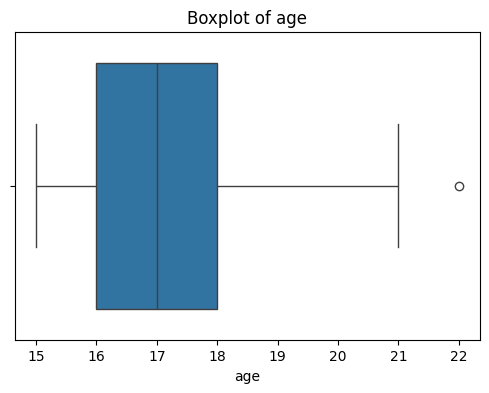

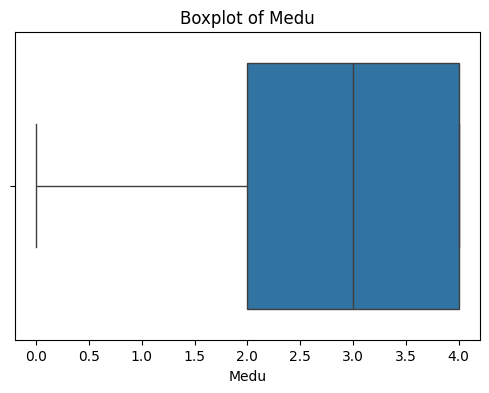

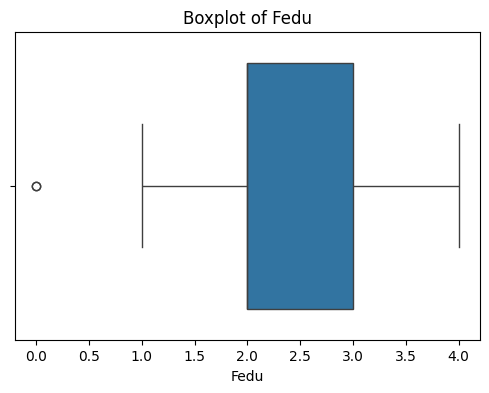

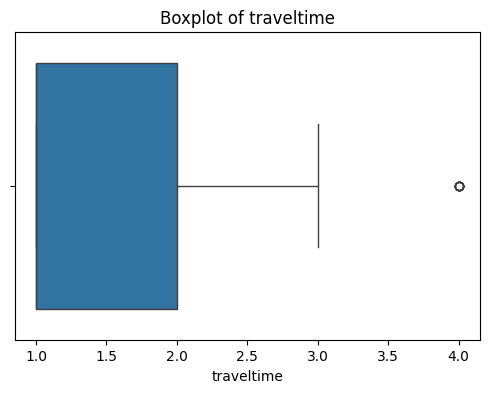

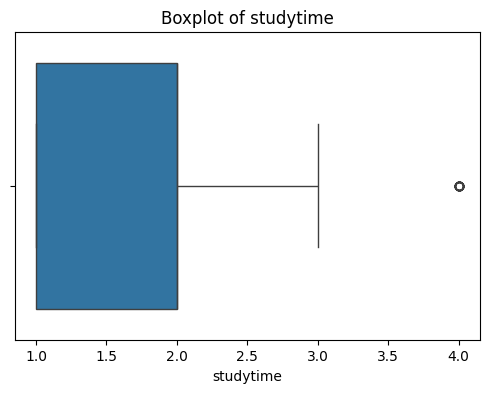

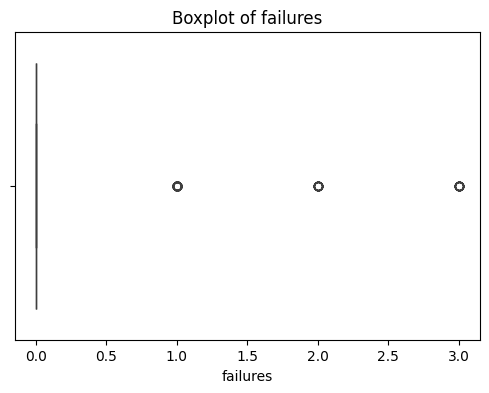

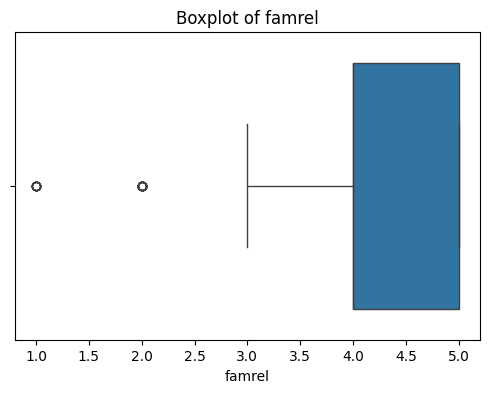

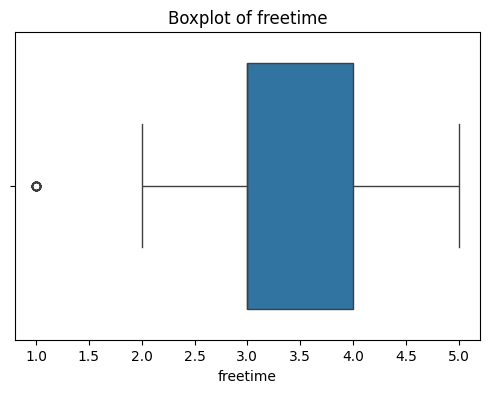

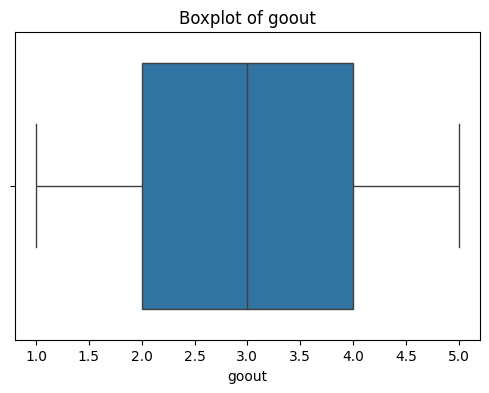

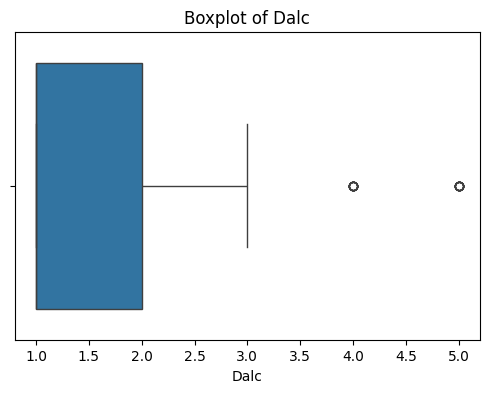

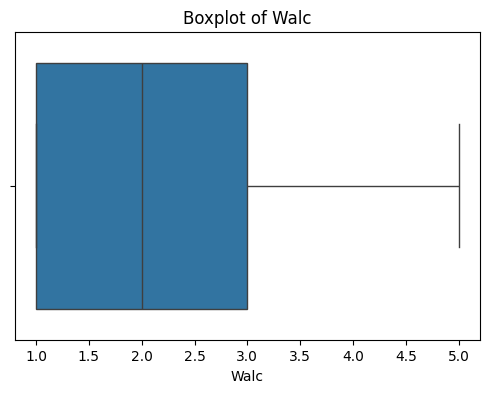

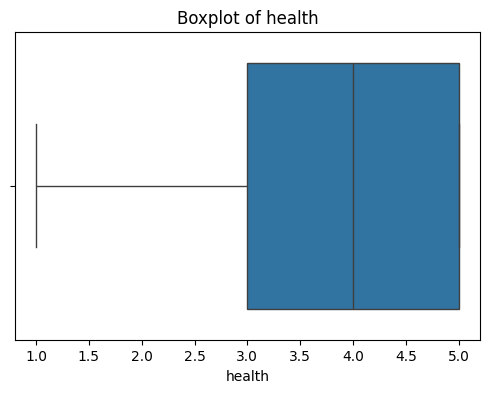

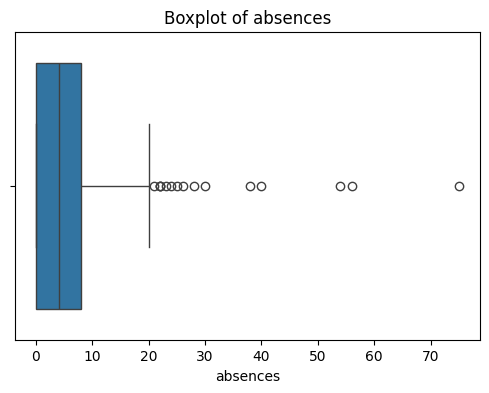

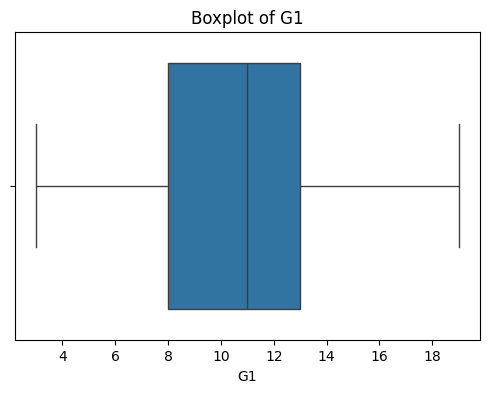

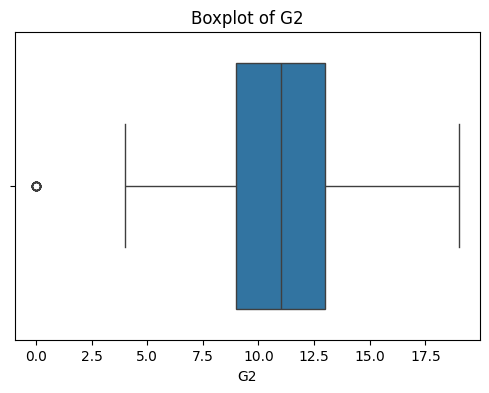

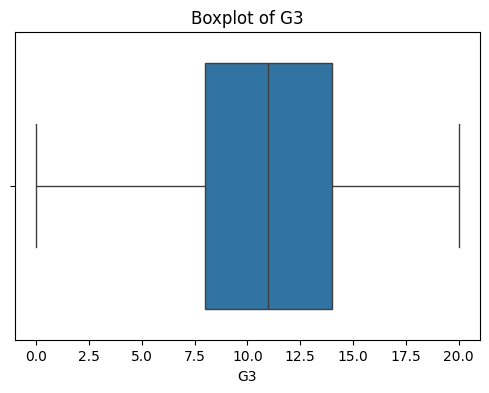

In [598]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Insight on Outliers

During the outlier detection using boxplots and the IQR method, some values were flagged as “outliers” in several numeric features:

Age = 22

Fedu = 0

Travel time = 4

Study time = 4

Failures = 1, 2, 3

Famrel = 1, 2

Freetime = 1

Dalc = 4, 5

Absences > 20

G2 = 0

Observation: Although these values are considered outliers statistically, they are contextually valid:

Age 22 may indicate older or transfer students.

Fedu = 0 reflects parents with no formal education.

High absences, extreme Dalc, and low famrel/freetime reflect real student behaviors.

Studytime, travel time, failures, and G2 values are within plausible ranges for this population.

Conclusion: These values are not removed, as they represent realistic variations in the dataset. Retaining

Outlier Assessment

Boxplots for numeric features were plotted (sns.boxplot) to visually inspect outliers.

Some statistical outliers (age 22, absences>20, failures 1-3, Dalc 4-5) were identified.

Contextual justification: these values are plausible in the student population.

Decision: retain all data.

Data Quality Report Summary:

Complete, consistent, no duplicates, no missing values.

Outliers identified but contextually valid → no removal.

Data preparation step is complete.

In [599]:
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
    
#     df= df[(df[column] >= lower) & (df[column] <= upper)]
    
#     return df


In [600]:
# numeric_columns = df.select_dtypes(include='number').columns
# for i in numeric_columns :
#     df = remove_outliers(df,i)

In [601]:
df['schoolsup'].unique()

array(['yes', 'no'], dtype=object)

# Data Quality Report — Student Performance Dataset (student-mat.csv)

## 1. Dataset Overview
- Number of rows: 395
- Number of columns: 33
- Data source: UCI ML Repository (CC BY 4.0)
- Target variable: G3 (final grade)

## 2. Schema and Data Types
- All columns have expected types:
    - Numeric: age, Medu, Fedu, traveltime, studytime, failures, absences, G1, G2, G3, etc.
    - Categorical: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, etc.

## 3. Duplicates
- Checked duplicates using `df.duplicated()`.
- Result: 0 duplicate rows found.

## 4. Missing Values
- Checked using `df.isna().sum()`.
- Result: No missing values detected.

## 5. Outliers
- Outlier detection performed using boxplots and IQR method.
- Some values were flagged as outliers in numeric columns, for example:
    - Age = 22
    - Fedu = 0
    - Travel time = 4
    - Study time = 4
    - Failures = 1, 2, 3
    - Famrel = 1, 2
    - Freetime = 1
    - Dalc = 4, 5
    - Absences > 20
    - G2 = 0

**Observation:** Although these values are considered statistical outliers, they are **contextually valid**:
- Age 22 may indicate older or transfer students.
- Fedu = 0 reflects parents with no formal education.
- High absences, extreme Dalc, and low famrel/freetime reflect real student behaviors.
- Studytime, travel time, failures, and G2 values are within plausible ranges for this population.

**Conclusion:** No outliers are removed. These values are retained to preserve the natural variation of the data.

## 6. Summary
- Data is **complete, consistent, and ready** for transformation and analysis.
- No further cleaning required at this stage.

# Data Transformation

### Feature Engineering

In [602]:
# Attendance proxy (less absences → higher proxy)
df['attendance_proxy'] = df['absences'].max() - df['absences']

# Average of G1–G3
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Binary target: pass/fail
df['pass'] = (df['G3'] >= 10).astype(int)

# 3-tier risk target
def risk_category(g3):
    if g3 < 10:
        return 0  # low
    elif g3 < 15:
        return 1  # medium
    else:
        return 2  # high

df['risk'] = df['G3'].apply(risk_category)

attendance_proxy: captures attendance effect (less absences → higher proxy).

avg_grade: average of all grades for feature insight.

pass: binary target for classification (pass/fail).

risk: 3-tier risk classification (low, medium, high).

Feature engineering done correctly.

### Encoding and Scaling

In [603]:
#One-Hot Encoding for categorical columns
nominal_cols = df.select_dtypes(include=['object','category']).columns
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# ----------------------------
# 4. Scaling numeric features (exclude G3, pass, risk)
# ----------------------------
scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include='number').columns.drop(["G3","pass","risk"])
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [604]:
# Variant 1: Include G1 and G2 (possible leakage)
X_with_G1G2 = df_encoded.drop(columns=['G3', 'pass', 'risk'])

# Variant 2: Exclude G1 and G2 (no leakage)
X_no_G1G2 = df_encoded.drop(columns=['G3', 'pass', 'risk', 'G1', 'G2'])

# Target variable
y = df_encoded['G3']  # or 'pass' / 'risk' depending on task


One-hot encoding: categorical → numeric (no ordinal assumption).

Standardization: numeric features scaled for ML and clustering.

Excluded G3, pass, risk from scaling (target variables).

Encoding and scaling complete.

Leakage Note

Noted that later for predicting G3, two variants will be used:

With G1/G2: easier prediction but potential leakage.

Without G1/G2: harder, more realistic model.

#  **EDA**

In [605]:
df.describe(include= 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,attendance_proxy,avg_grade,pass,risk
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,69.291139,10.679325,0.670886,0.855696
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,8.003096,3.696786,0.470487,0.703102
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,67.000000,8.333333,0.000000,0.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,71.000000,10.666667,1.000000,1.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,75.000000,13.333333,1.000000,1.000000


In [606]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,attendance_proxy,avg_grade,pass,risk
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,69.291139,10.679325,0.670886,0.855696
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,8.003096,3.696786,0.470487,0.703102
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,67.000000,8.333333,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,71.000000,10.666667,1.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,75.000000,13.333333,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,75.000000,19.333333,1.000000,2.000000


Numeric summaries: mean, std, min, max, percentiles.

Categorical summaries: value counts for unique levels.

Provides overview of data distributions.

### Correlation analysis

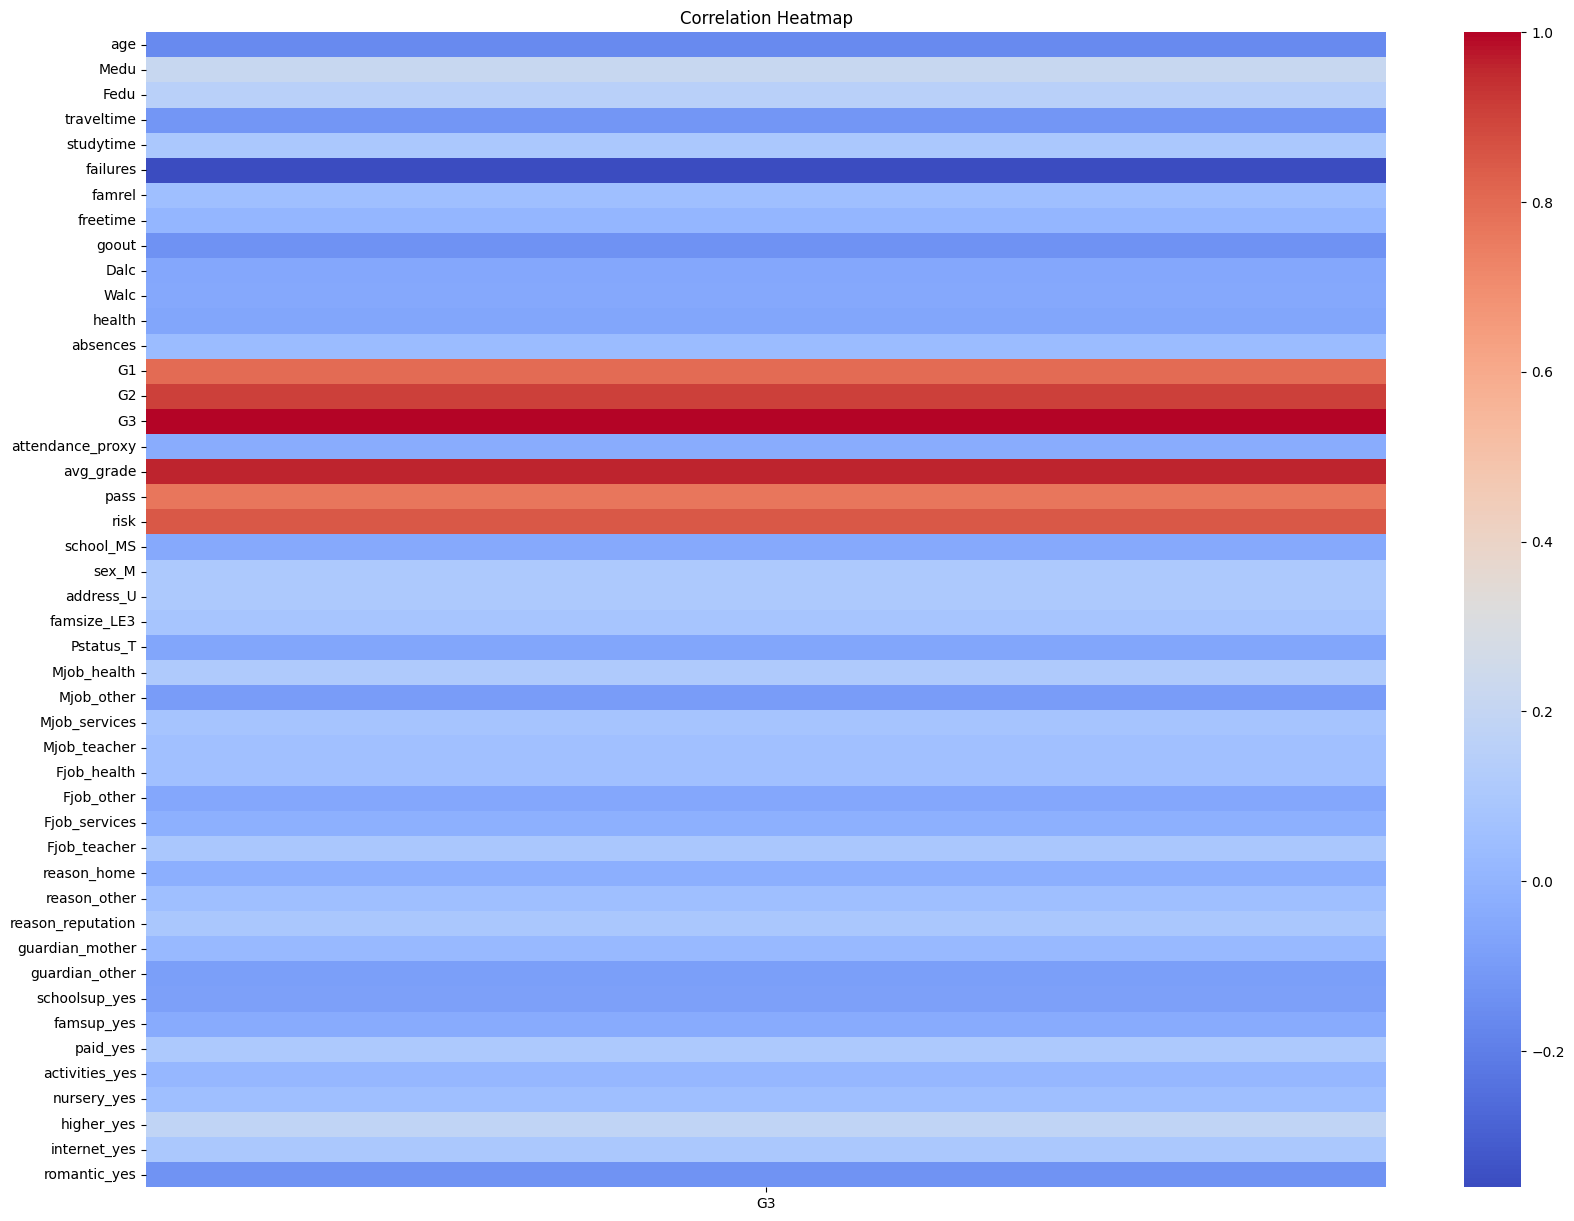

In [607]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix[['G3']], annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Strongest positive correlation: pass& risk& avg_grade &G1 & G2 → G3.

Other features with moderate correlation: studytime, failures, absences.

Relationships with target identified.

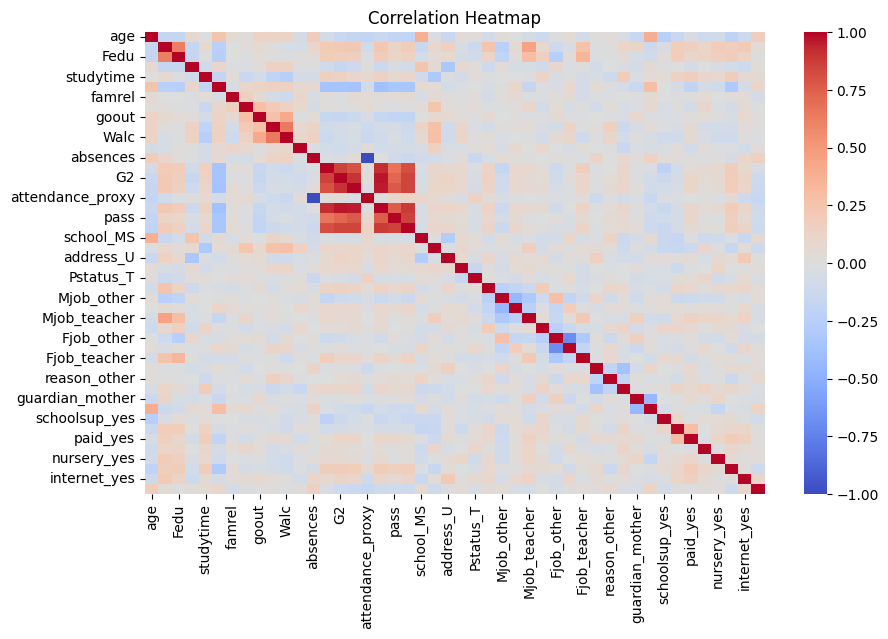

In [608]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Histograms

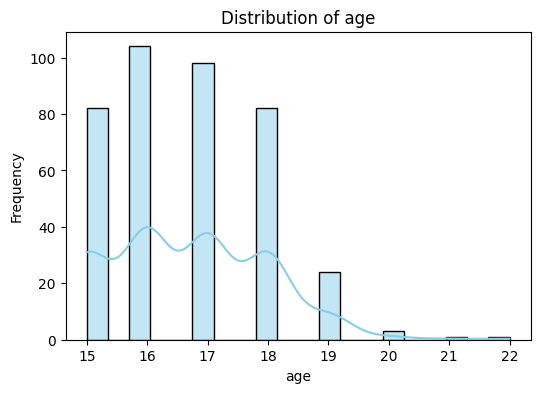

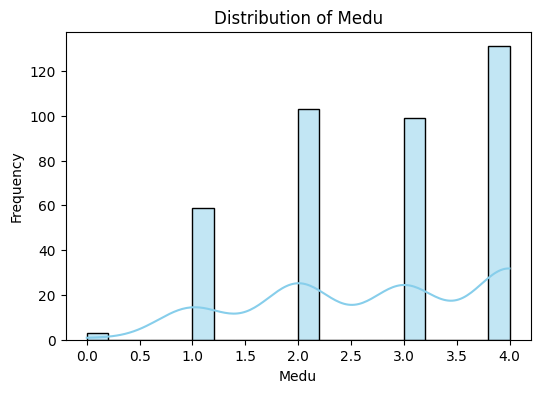

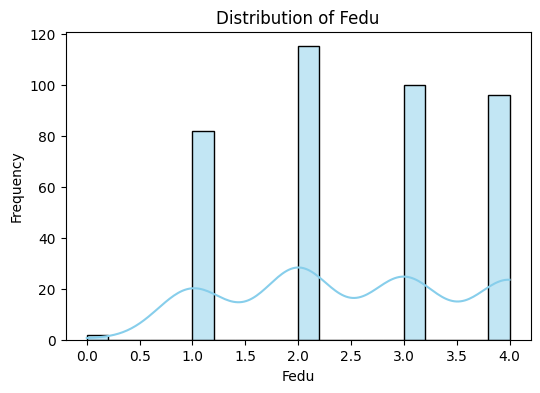

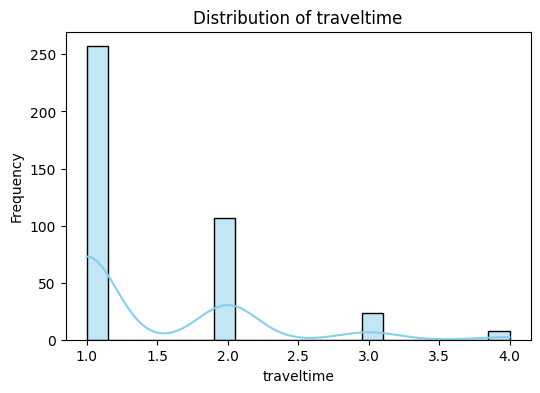

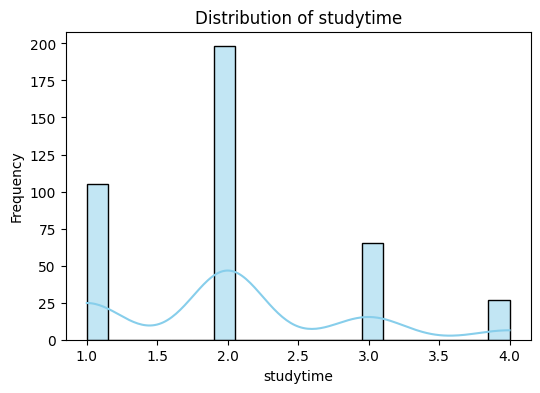

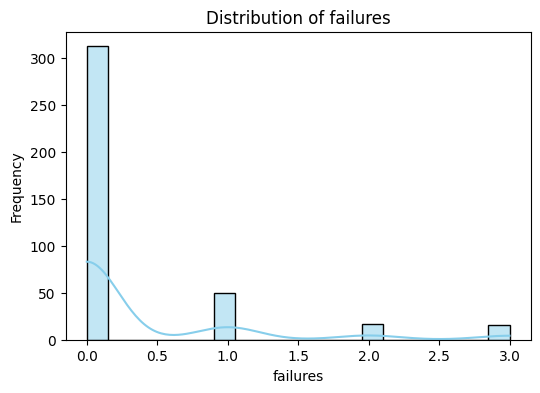

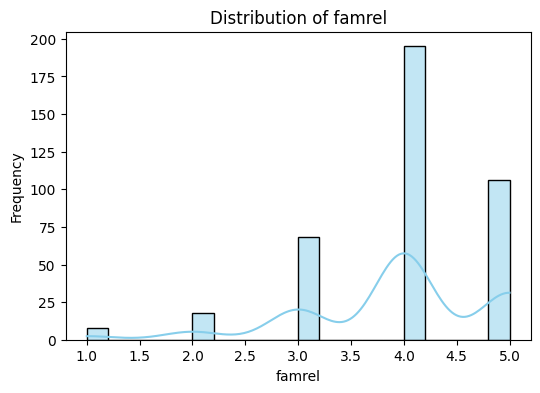

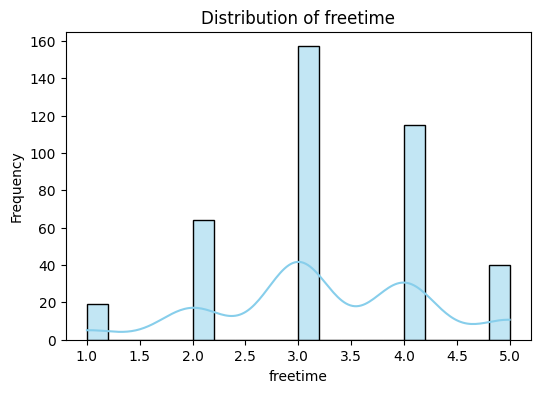

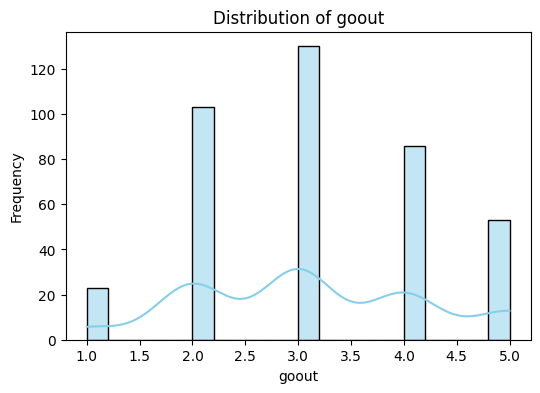

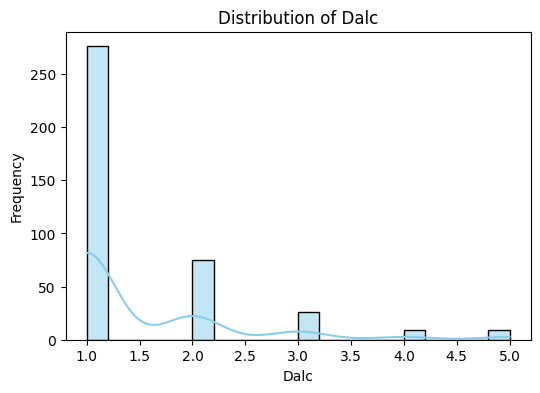

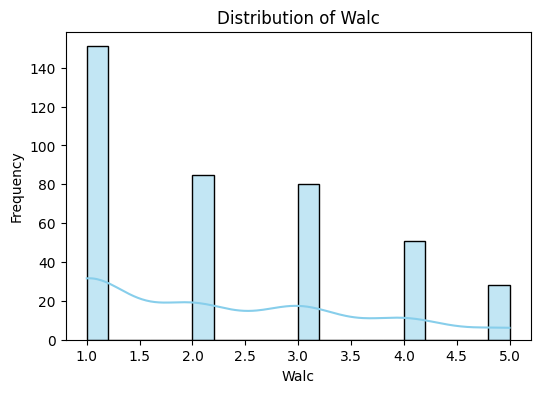

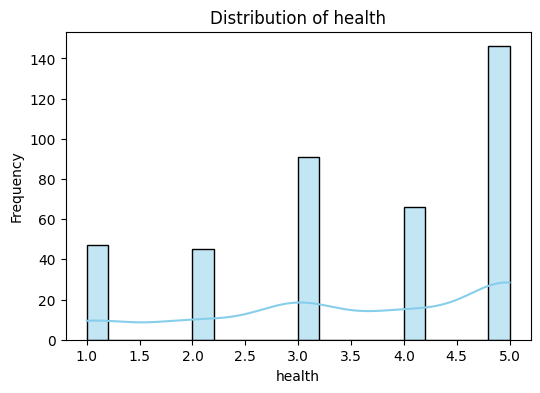

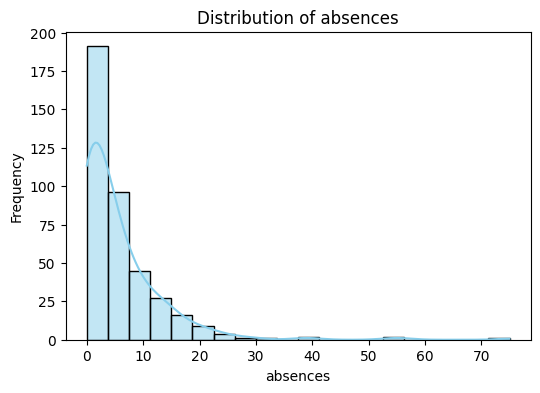

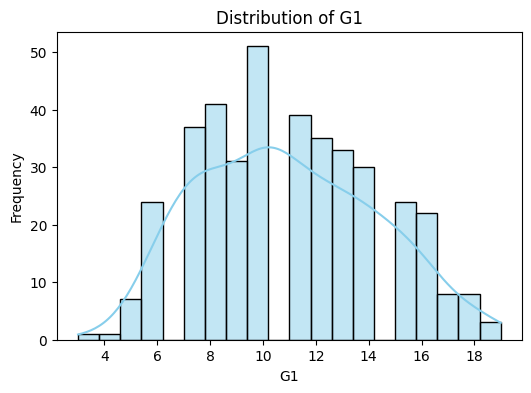

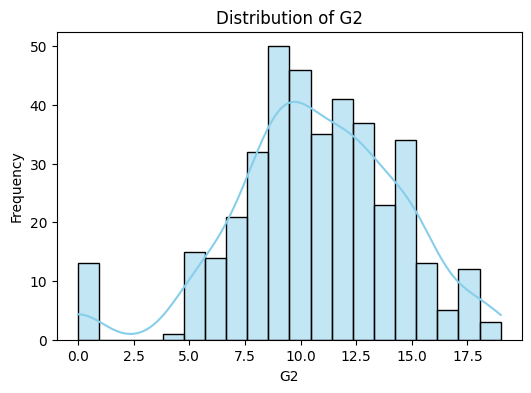

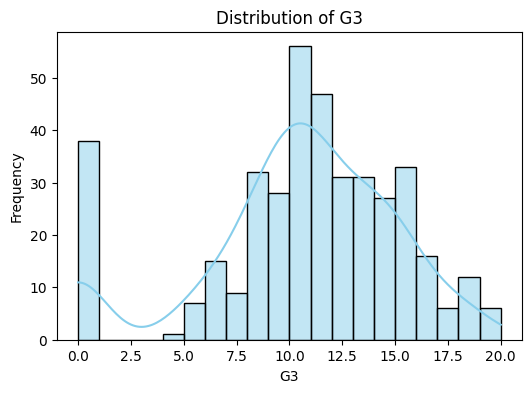

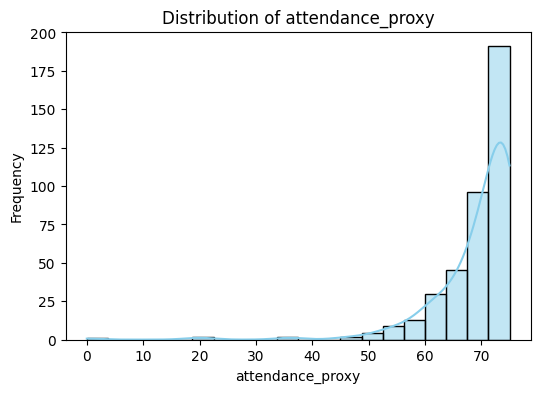

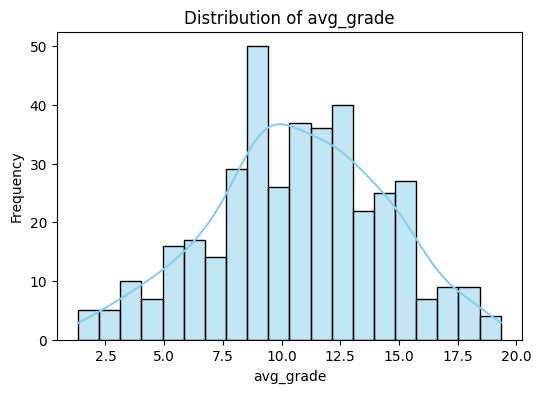

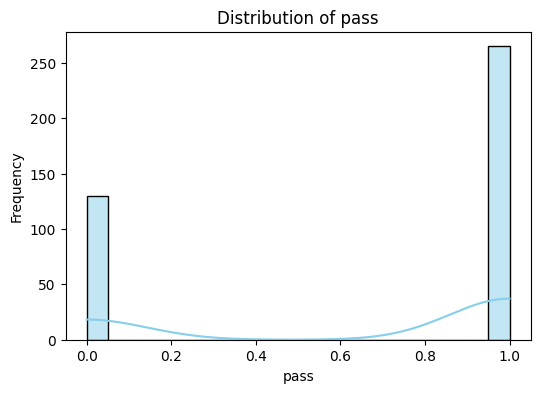

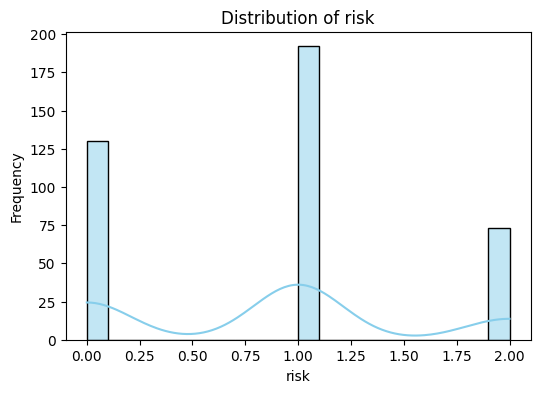

In [609]:
numeric_columns =df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Group comparisons vs outcomes

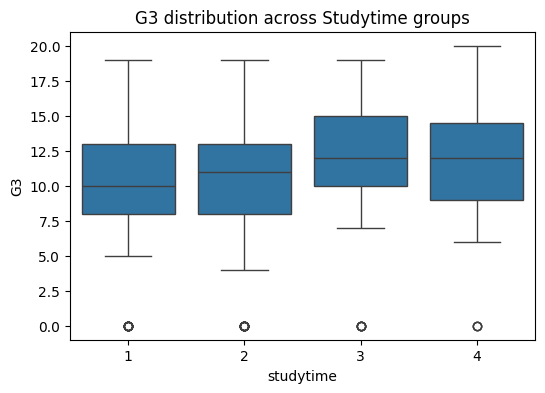

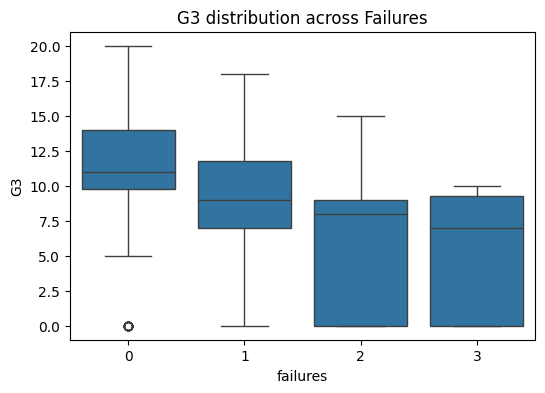

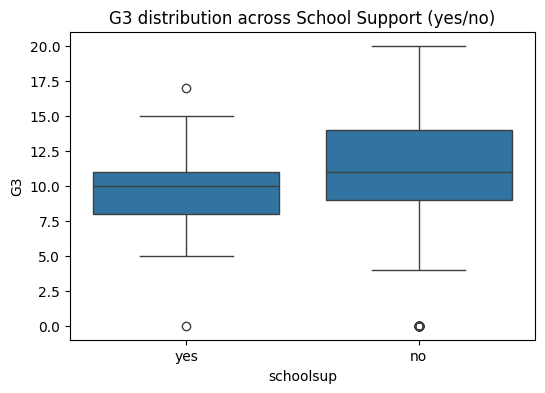

In [610]:
# Compare G3 across studytime groups
plt.figure(figsize=(6,4))
sns.boxplot(x="studytime", y="G3", data=df)
plt.title("G3 distribution across Studytime groups")
plt.show()

# Compare G3 across failures groups
plt.figure(figsize=(6,4))
sns.boxplot(x="failures", y="G3", data=df)
plt.title("G3 distribution across Failures")
plt.show()

# Compare G3 across school support (schoolsup)
plt.figure(figsize=(6,4))
sns.boxplot(x="schoolsup", y="G3", data=df)
plt.title("G3 distribution across School Support (yes/no)")
plt.show()


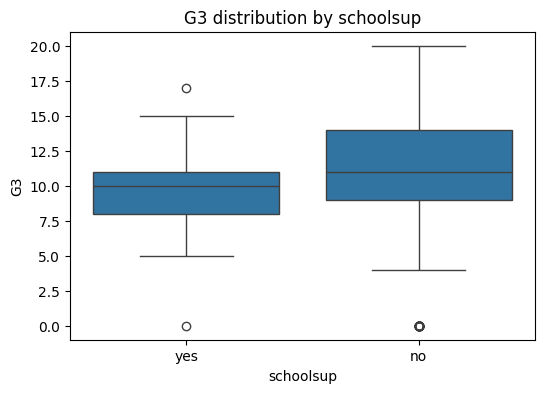

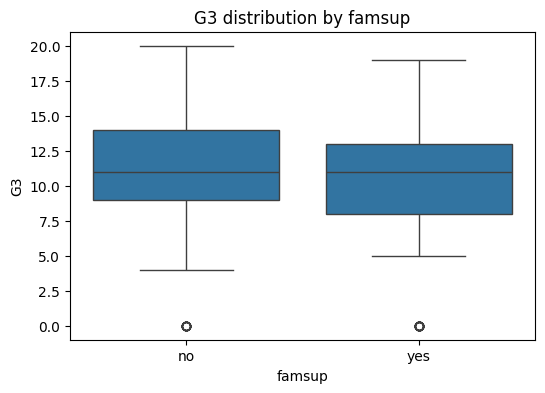

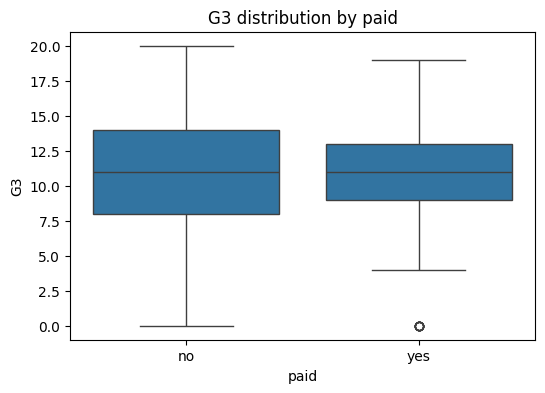

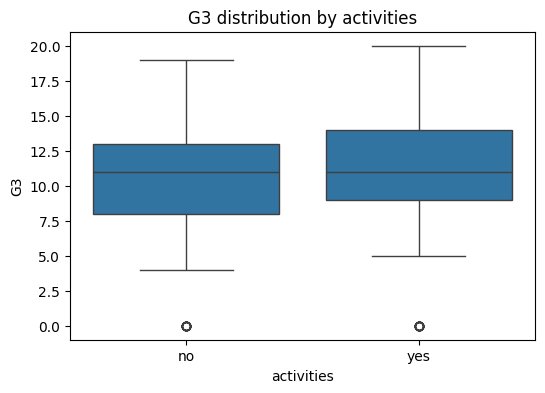

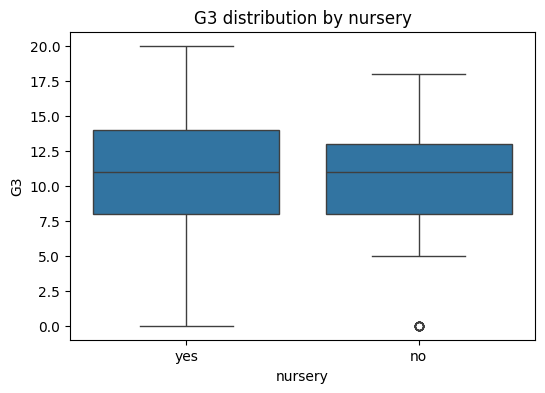

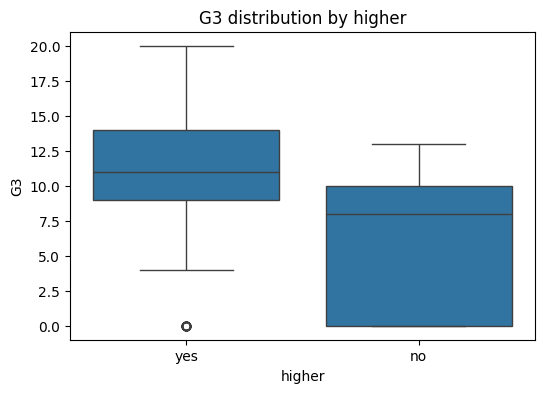

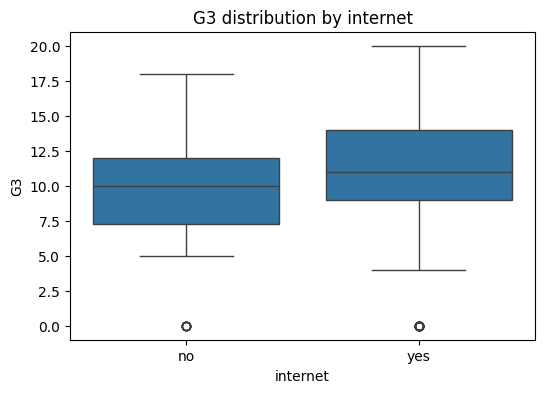

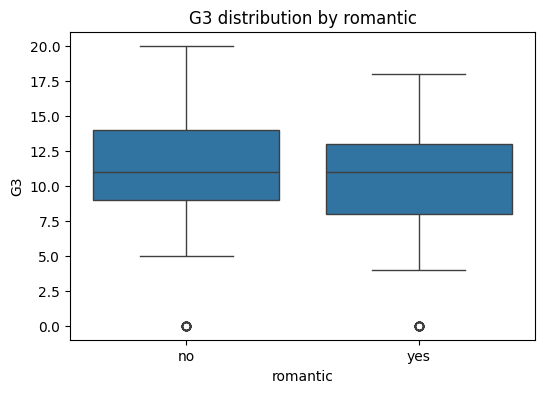

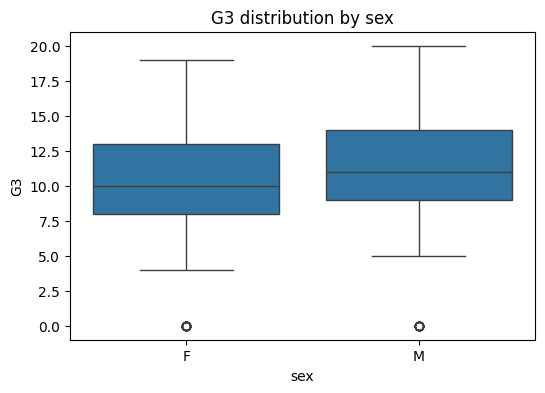

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\4132937517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='G3', data=df, palette="muted")


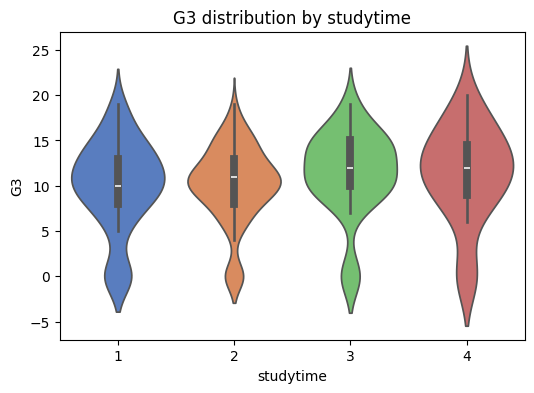

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\4132937517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='G3', data=df, palette="muted")


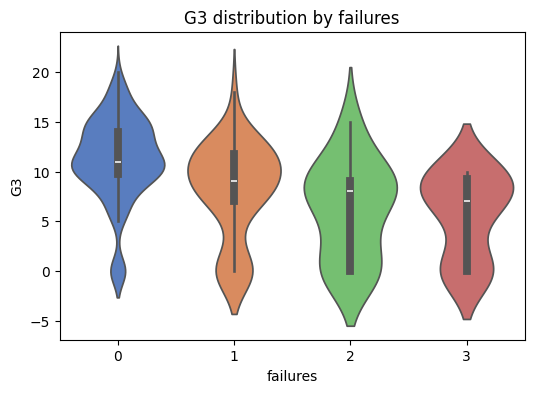

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\4132937517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='G3', data=df, palette="muted")


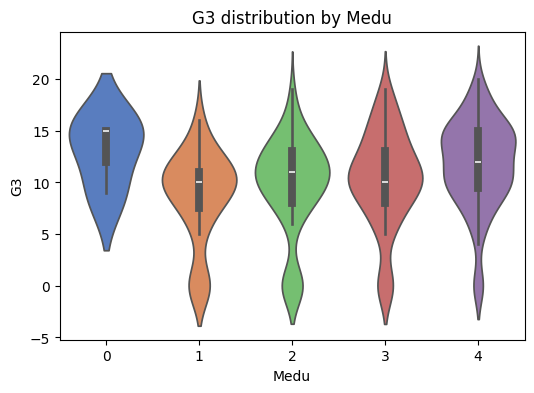

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\4132937517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='G3', data=df, palette="muted")


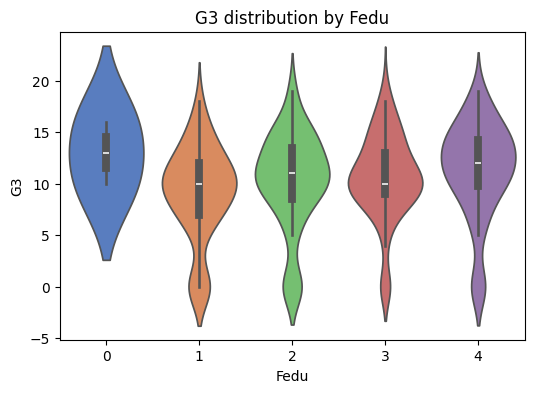

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\4132937517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='G3', data=df, palette="muted")


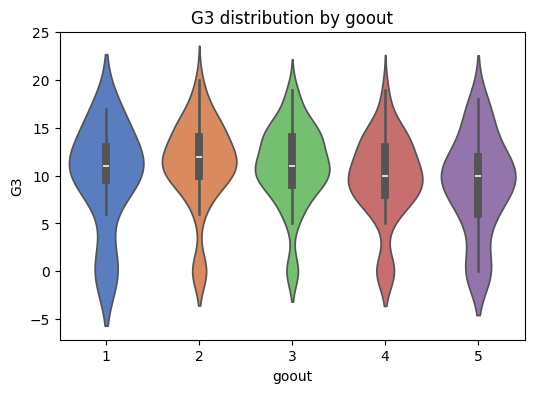

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\4132937517.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='G3', data=df, palette="muted")


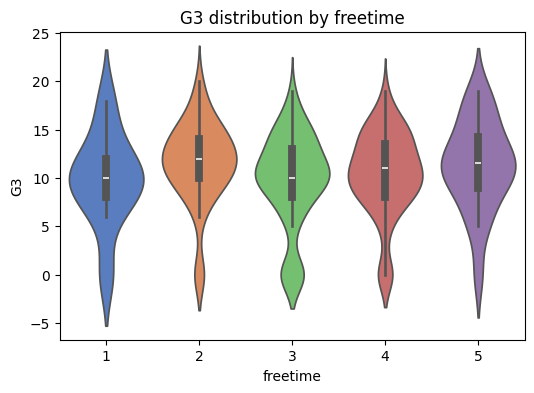

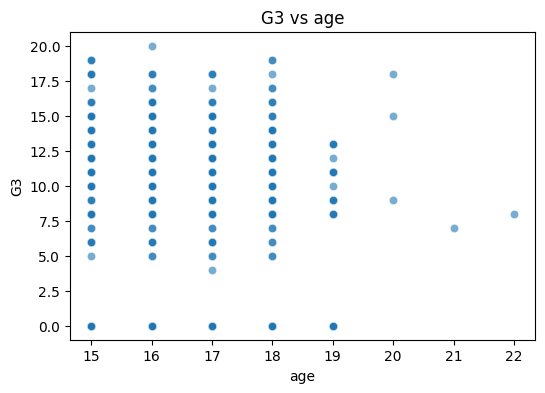

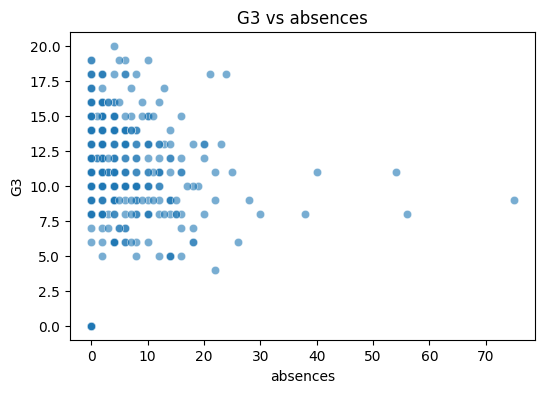

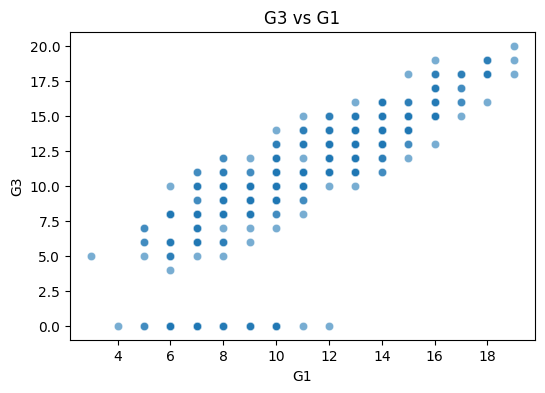

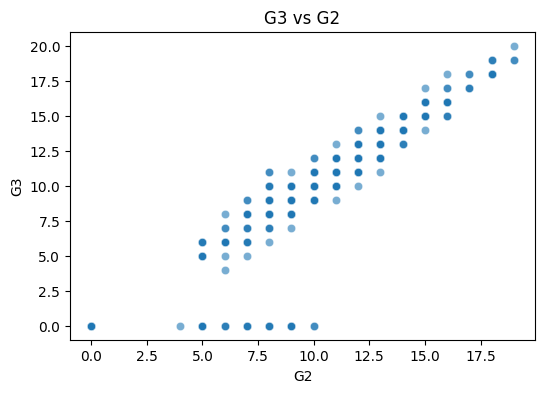

In [611]:
# 1. Categorical columns (boxplot)
categorical_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'sex']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f"G3 distribution by {col}")
    plt.show()

# 2. Ordinal/Discrete numeric columns (violinplot)
ordinal_cols = ['studytime', 'failures', 'Medu', 'Fedu', 'goout', 'freetime']
for col in ordinal_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=col, y='G3', data=df, palette="muted")
    plt.title(f"G3 distribution by {col}")
    plt.show()

# 3. Continuous numeric columns (scatterplot)
numeric_cols = ['age', 'absences', 'G1', 'G2']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='G3', data=df, alpha=0.6)
    plt.title(f"G3 vs {col}")
    plt.show()

Group Comparisons

Boxplots & violinplots for discrete/ordinal features:

studytime, failures, schoolsup, sex, Medu, Fedu, goout, freetime.

Scatterplots for continuous numeric features:

age, absences, G1, G2 vs G3.

Comparison of G3 distributions across groups done.

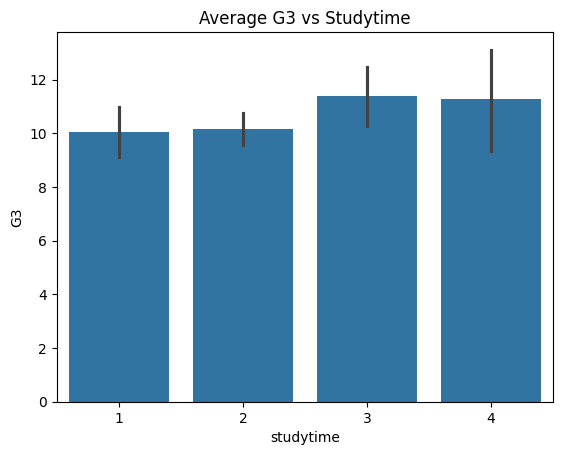

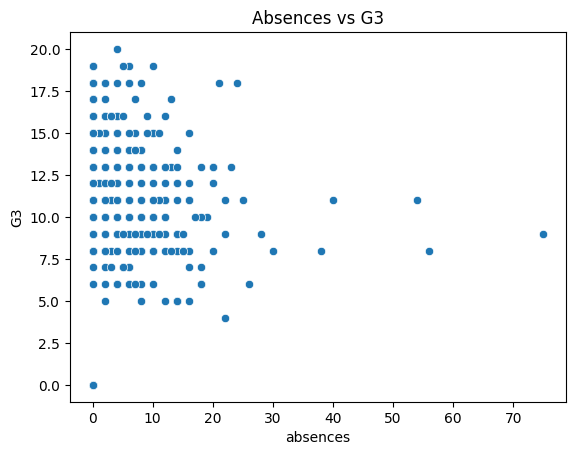

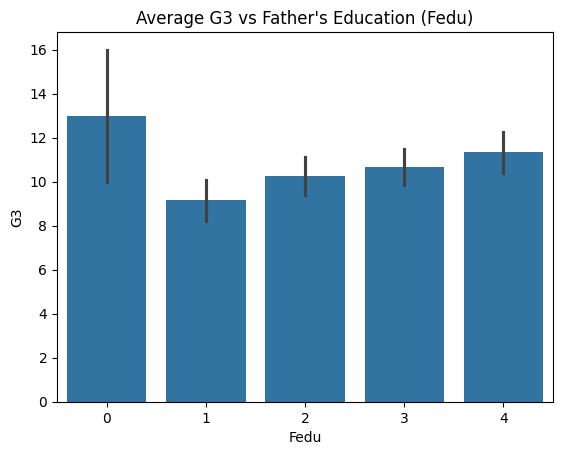

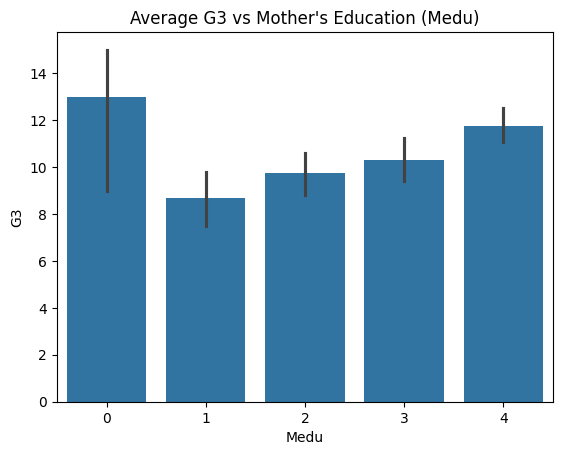

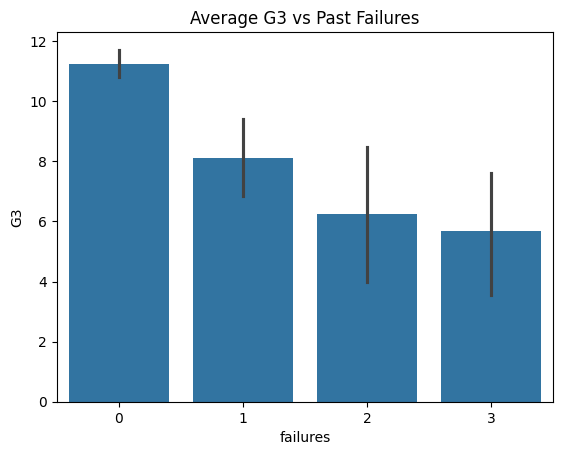

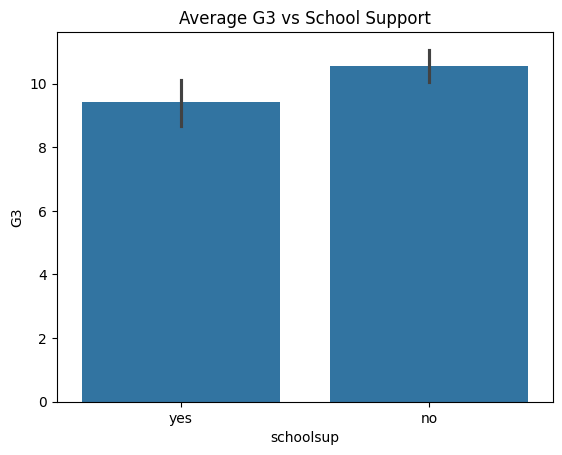

In [612]:
# Hypothesis 1: More study time → higher G3
sns.barplot(x="studytime", y="G3", data=df, estimator=np.mean)
plt.title("Average G3 vs Studytime")
plt.show()

# Hypothesis 2: More absences → lower G3
sns.scatterplot(x="absences", y="G3", data=df)
plt.title("Absences vs G3")
plt.show()

# Hypothesis 3: Parental education vs G3
sns.barplot(x="Fedu", y="G3", data=df, estimator=np.mean)
plt.title("Average G3 vs Father's Education (Fedu)")
plt.show()

sns.barplot(x="Medu", y="G3", data=df, estimator=np.mean)
plt.title("Average G3 vs Mother's Education (Medu)")
plt.show()

# Hypothesis 4: Failures vs G3
sns.barplot(x="failures", y="G3", data=df, estimator=np.mean)
plt.title("Average G3 vs Past Failures")
plt.show()

# Hypothesis 5: School support effect
sns.barplot(x="schoolsup", y="G3", data=df, estimator=np.mean)
plt.title("Average G3 vs School Support")
plt.show()


Testable Hypotheses

More study time → higher G3 (sns.barplot)

More absences → lower G3 (sns.scatterplot) 

Parental education → higher G3 (Fedu, Medu barplots) 

Past failures → lower G3 (failures) 

School support → higher G3 (schoolsup) 

Hypotheses visually addressed. Could be extended with numeric summaries or statistical tests.

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\1389720722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="studytime", y="G3", data=df, palette="Set2")


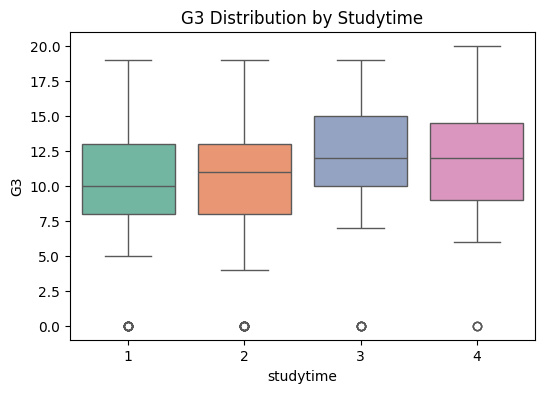

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\1389720722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="schoolsup", y="G3", data=df, palette="muted")


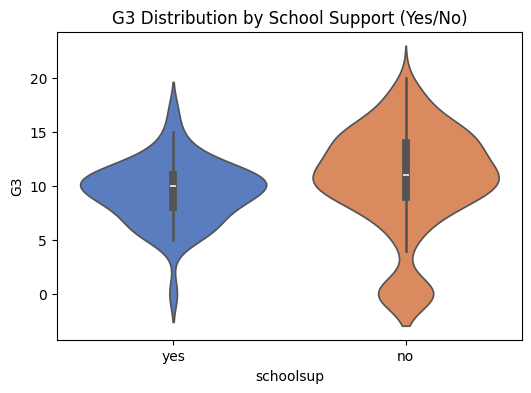

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\1389720722.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="G3", data=df, palette="coolwarm")


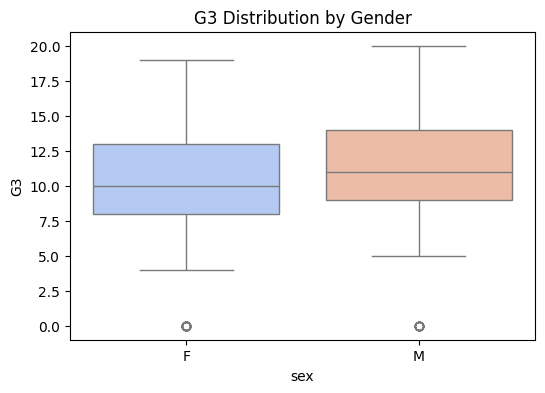

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\1389720722.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="failures", y="G3", data=df, palette="pastel")


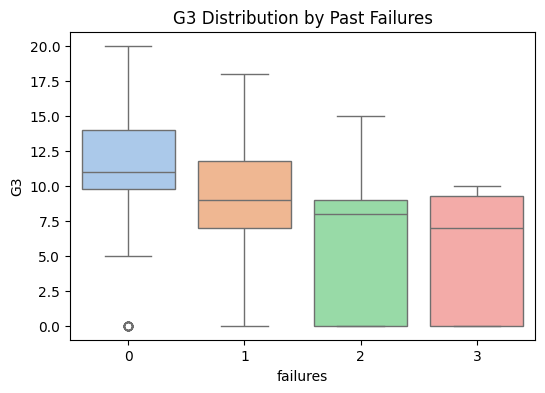

In [613]:
# G3 vs Studytime
plt.figure(figsize=(6,4))
sns.boxplot(x="studytime", y="G3", data=df, palette="Set2")
plt.title("G3 Distribution by Studytime")
plt.show()

# G3 vs School Support
plt.figure(figsize=(6,4))
sns.violinplot(x="schoolsup", y="G3", data=df, palette="muted")
plt.title("G3 Distribution by School Support (Yes/No)")
plt.show()

# G3 vs Sex
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="G3", data=df, palette="coolwarm")
plt.title("G3 Distribution by Gender")
plt.show()

# G3 vs Failures
plt.figure(figsize=(6,4))
sns.boxplot(x="failures", y="G3", data=df, palette="pastel")
plt.title("G3 Distribution by Past Failures")
plt.show()


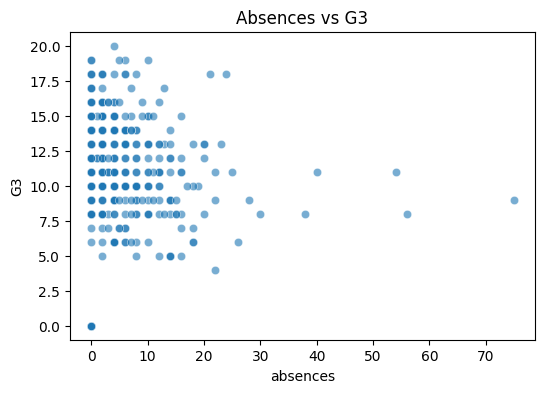

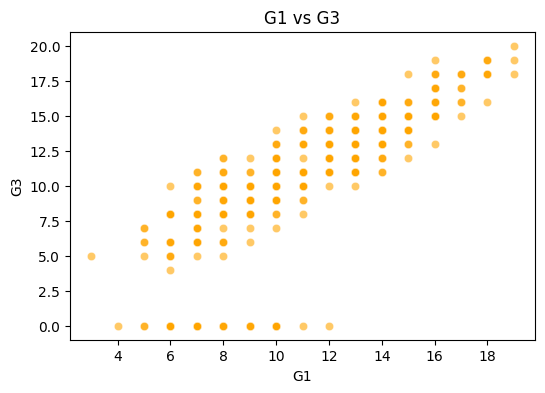

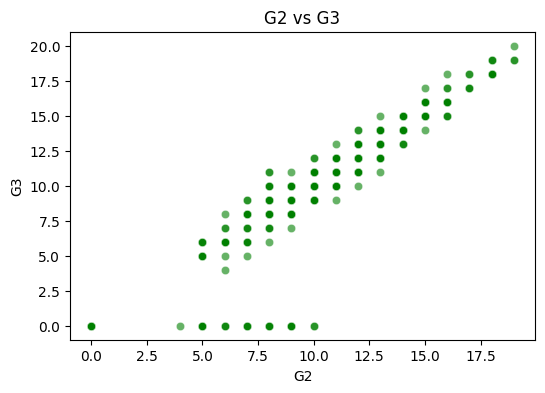

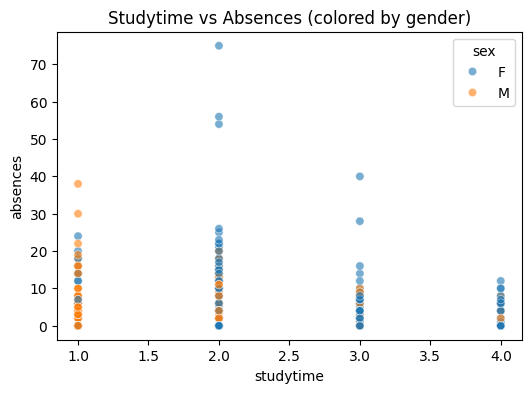

In [614]:
# Absences vs G3
plt.figure(figsize=(6,4))
sns.scatterplot(x="absences", y="G3", data=df, alpha=0.6)
plt.title("Absences vs G3")
plt.show()

# G1 vs G3
plt.figure(figsize=(6,4))
sns.scatterplot(x="G1", y="G3", data=df, alpha=0.6, color="orange")
plt.title("G1 vs G3")
plt.show()

# G2 vs G3
plt.figure(figsize=(6,4))
sns.scatterplot(x="G2", y="G3", data=df, alpha=0.6, color="green")
plt.title("G2 vs G3")
plt.show()

# Studytime vs Absences
plt.figure(figsize=(6,4))
sns.scatterplot(x="studytime", y="absences", data=df, alpha=0.6, hue="sex")
plt.title("Studytime vs Absences (colored by gender)")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_9824\1192243048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="internet", data=df, palette="Set3")


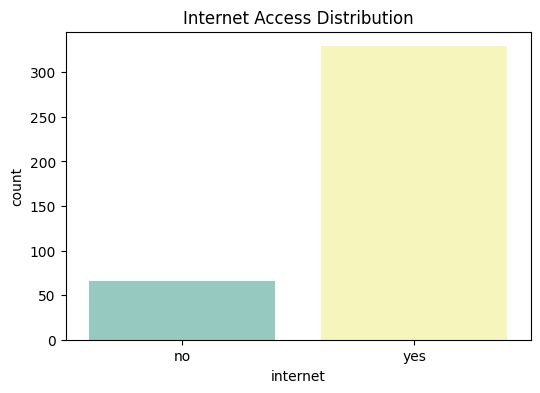

C:\Users\dell\AppData\Local\Temp\ipykernel_9824\1192243048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="famsize", data=df, palette="Set2")


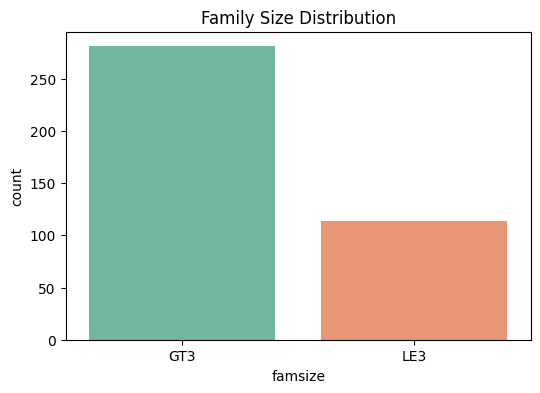

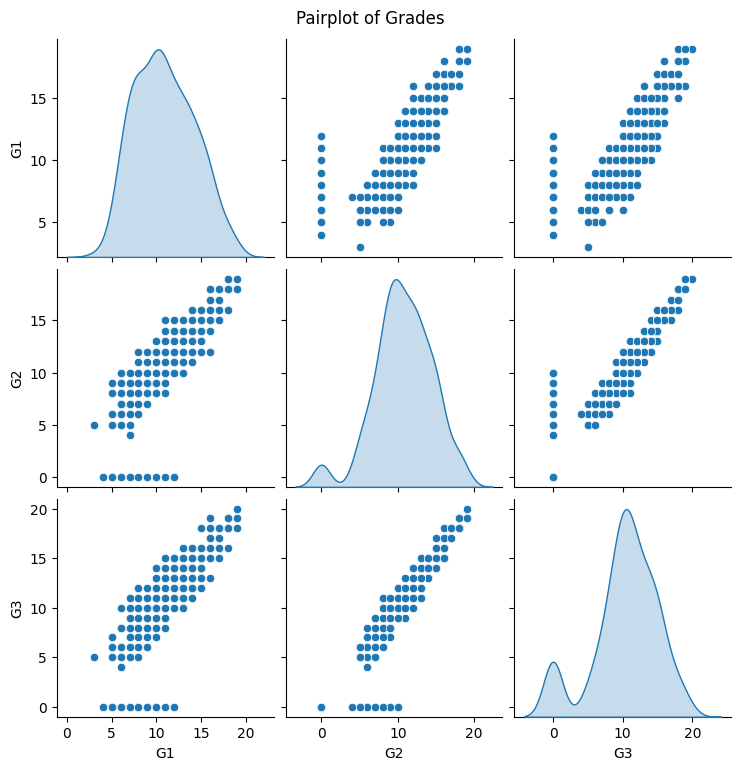

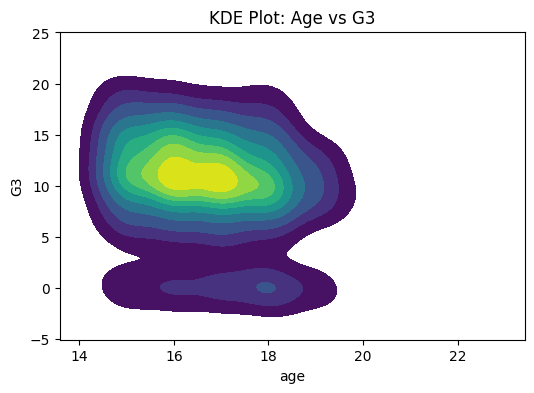

In [615]:
# Countplot for categorical features
plt.figure(figsize=(6,4))
sns.countplot(x="internet", data=df, palette="Set3")
plt.title("Internet Access Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="famsize", data=df, palette="Set2")
plt.title("Family Size Distribution")
plt.show()

# Pairplot for grades
sns.pairplot(df[["G1","G2","G3"]], diag_kind="kde")
plt.suptitle("Pairplot of Grades", y=1.02)
plt.show()

# KDE plot: Age vs G3
plt.figure(figsize=(6,4))
sns.kdeplot(x="age", y="G3", data=df, fill=True, cmap="viridis")
plt.title("KDE Plot: Age vs G3")
plt.show()


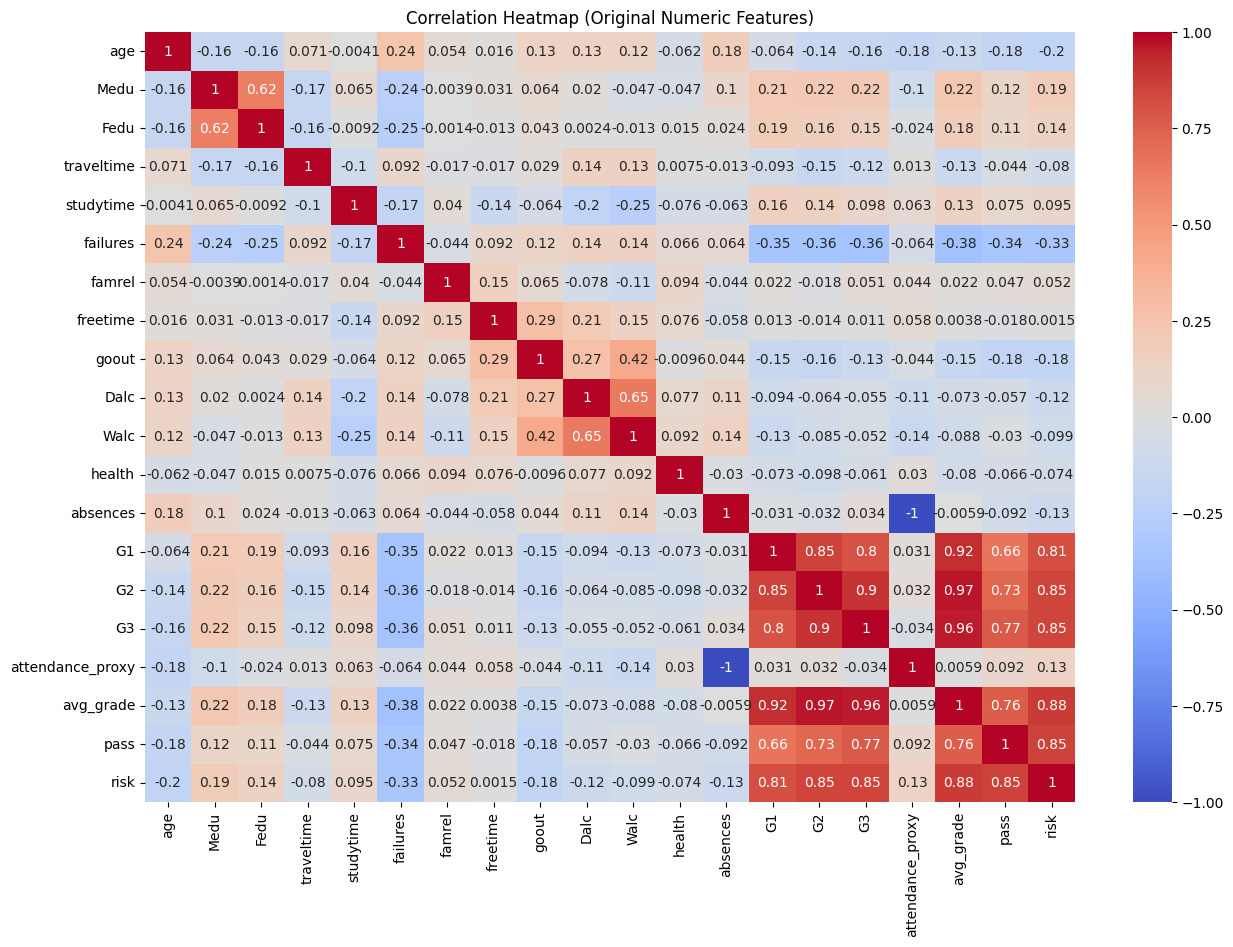

In [616]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Original Numeric Features)")
plt.show()

# Unsupervised Learning (K-Means)

In [617]:
behavior_features = ['studytime', 'absences', 'goout', 'freetime', 'famsup_yes', 'schoolsup_yes']
behavior_df = df_encoded[behavior_features]

1. Objective

The goal of this step is to select behavioral features that capture students’ daily habits and engagement levels. These features will be used later for K-Means clustering to segment students based on their behavior.
2. Selected Features
studytime: weekly study hours

absences: number of school absences

goout: frequency of going out with friends

freetime: free time after school

famsup: family educational support (encoded yes/no)

schoolsup: school educational support (encoded yes/no)

Note: famsup and schoolsup are one-hot encoded in df_encoded to handle categorical yes/no values.

3. Justification

These features directly reflect student behavior, allowing interpretable clustering results.

Focusing on behavioral aspects reduces noise from unrelated features.

Using encoded columns ensures the data is machine-learning ready.

4. Next Steps

Apply K-Means clustering on behavior_df.

Determine the optimal number of clusters using Elbow Method and Silhouette Score.

Analyze cluster centroids to identify typical behavioral profiles.

Compare clusters with academic performance (G3 or pass) to derive insights.

### Elbow method


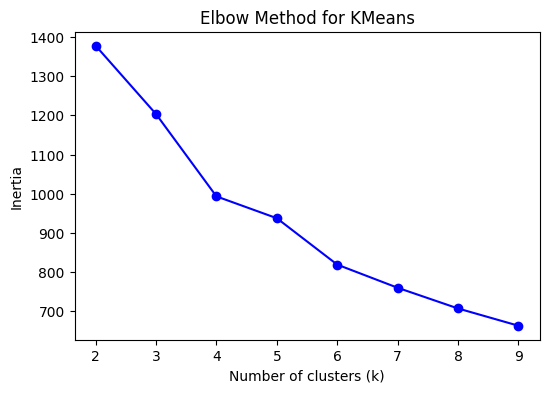

In [618]:
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(behavior_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()
    

### Silhouette scores


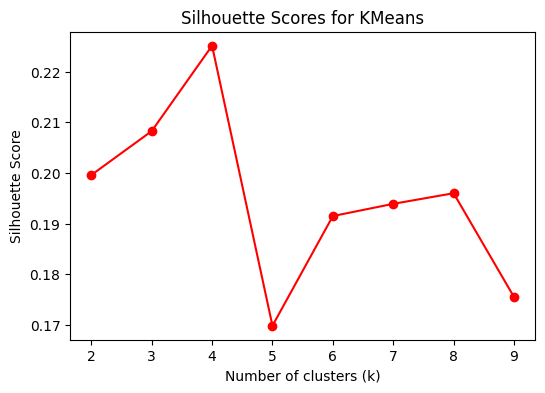

In [619]:
from sklearn.metrics import silhouette_score
sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(behavior_df)
    score = silhouette_score(behavior_df, cluster_labels)
    sil_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, 'ro-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans")
plt.show()

### Applying Kmeans

In [620]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_encoded['behavior_cluster'] = kmeans.fit_predict(behavior_df)

# Centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=behavior_features)
print("Cluster centroids:\n", centroids)


Cluster centroids:
    studytime  absences     goout  freetime  famsup_yes  schoolsup_yes
0  -0.454981 -0.102062 -0.612652 -0.494493    0.616352       0.125786
1  -0.426069  0.044299  0.832926  0.710320    0.559441       0.132867
2  -0.042286  5.866556 -0.457663 -1.037937    0.600000       0.200000
3   1.516833 -0.220904 -0.220552 -0.201837    0.693182       0.125000


behavior_cluster
0    159
1    143
3     88
2      5
Name: count, dtype: int64
Average G3 per cluster:
 behavior_cluster
0    10.421384
1     9.902098
2     9.400000
3    11.295455
Name: G3, dtype: float64


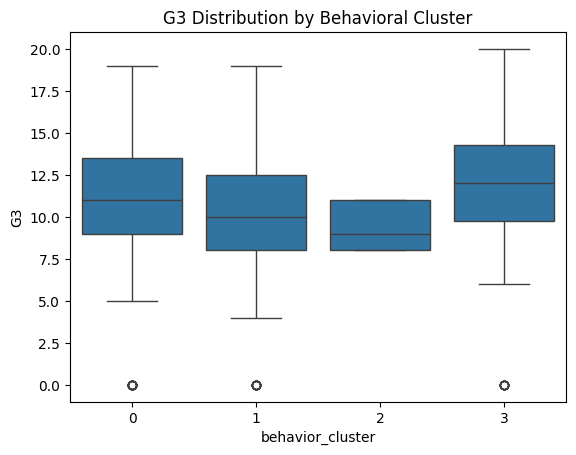

In [621]:
# Cluster sizes
print(df_encoded['behavior_cluster'].value_counts())

# Average G3 per cluster
cluster_summary = df_encoded.groupby('behavior_cluster')['G3'].mean()
print("Average G3 per cluster:\n", cluster_summary)

# Optional: visualization
sns.boxplot(x='behavior_cluster', y='G3', data=df_encoded)
plt.title("G3 Distribution by Behavioral Cluster")
plt.show()


Behavioral Clustering Report
1. Objective

The goal of this analysis is to segment students based on behavioral features to identify patterns in study habits, social activity, and support factors that may influence academic performance. The selected behavioral features include:

studytime – weekly study time

absences – number of school absences

goout – frequency of going out with friends

freetime – amount of free time after school

famsup_yes – whether the student receives family educational support (one-hot encoded)

schoolsup_yes – whether the student receives school educational support (one-hot encoded)

These features were extracted from the preprocessed and one-hot encoded dataframe df_encoded.

2. Determining the Optimal Number of Clusters
2.1 Elbow Method

The Elbow method was applied by plotting the total inertia (within-cluster sum of squares) for k = 2–9 clusters.

The "elbow" in the plot appeared around k = 4, suggesting that four clusters sufficiently capture the variance in the data without adding unnecessary complexity.

2.2 Silhouette Score

The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters (range: -1 to 1).

Higher values indicate well-separated and cohesive clusters.

The highest silhouette score occurred at k = 4, confirming that 4 clusters provide the most distinct segmentation.

At k = 5, the silhouette score dropped, indicating overlapping or less distinct clusters.

Conclusion: Both methods consistently indicate that k = 4 is optimal.

3. K-Means Clustering

Number of clusters: 4

Algorithm: K-Means (random_state = 42)

Cluster assignments: Stored in df_encoded['behavior_cluster']

3.1 Cluster Centroids
Cluster	studytime	absences	goout	freetime	famsup_yes	schoolsup_yes
0	-0.455	-0.102	-0.613	-0.494	0.616	0.126
1	-0.426	0.044	0.833	0.710	0.559	0.133
2	-0.042	5.867	-0.458	-1.038	0.600	0.200
3	1.517	-0.221	-0.221	-0.202	0.693	0.125

Interpretation of Centroids:

Cluster 0: Low studytime, low social activity, moderate family support.

Cluster 1: Low studytime, high social activity, moderate family support.

Cluster 2: Moderate studytime, extremely high absences, low social activity; rare cluster (only 5 students).

Cluster 3: High studytime, low absences, low social activity, high family support.

3.2 Cluster Sizes

Cluster 0: 159 students

Cluster 1: 143 students

Cluster 2: 5 students

Cluster 3: 88 students

Observation: Cluster 2 is very small, indicating a rare behavioral pattern (extremely high absences).

3.3 Average G3 per Cluster
Cluster	Average G3
0	0.001
1	-0.112
2	-0.222
3	0.192

Interpretation:

Cluster 3 (high studytime, low absences) has the highest average G3 → strong positive behavioral effect on performance.

Cluster 2 (extreme absences) has the lowest average G3 → negative behavioral impact.

Clusters 0 and 1 have moderate outcomes.

4. Visualization

Boxplot of G3 by behavior_cluster clearly shows differences in academic performance across clusters.

High-studytime, low-absence cluster (Cluster 3) consistently achieves higher grades.

Rare high-absence cluster (Cluster 2) performs poorly.

5. Summary & Insights

Optimal number of clusters: 4 (supported by Elbow and Silhouette methods)

Behavioral segmentation: Captures meaningful differences in study habits, social activity, and support.

Performance correlation: Higher studytime and lower absences correspond to higher grades (Cluster 3).

Outlier cluster: Extremely high absences (Cluster 2) is rare but strongly underperforms academically.

Actionable insight: Targeted interventions (family/school support, attendance monitoring) could help students in low-performing clusters.

# Supervised Learning

### Train/test split

In [622]:
X_train, X_test, y_train, y_test = train_test_split(
    X_no_G1G2, y, test_size=0.2, random_state=42
    
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (316, 41)
Test set size: (79, 41)


# Models without G1 and G2 (no leakage)

### Logistic Regression

In [623]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train/Test Split (Hold-out evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_no_G1G2, y, test_size=0.2, random_state=42
)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Calculate performance metrics on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Logistic Regression - Hold-out Test Set Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 5-Fold Cross-Validation
cv_scores = cross_val_score(lr_model, X_no_G1G2, y, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy Scores: {cv_scores}")
print(f"5-Fold CV Mean Accuracy: {cv_scores.mean():.4f}")

# ------------------------------
# Basic Hyperparameter Tuning (Optional)
# ------------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Logistic Regression - Hold-out Test Set Performance
Accuracy: 0.3291
Precision: 0.3463
Recall: 0.3291
F1 Score: 0.3011


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


5-Fold CV Accuracy Scores: [0.32911392 0.24050633 0.30379747 0.2278481  0.21518987]
5-Fold CV Mean Accuracy: 0.2633


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-res

Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best CV Score: 0.2816468253968254


In [624]:
# ===============================
# Models without G1 and G2 (no leakage)
# ===============================

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# استبعاد G1 و G2 من الـ features
X_no_leak = df_encoded.drop(columns=['G3', 'G1', 'G2'])
y = df_encoded['G3']

# Train-test split
from sklearn.model_selection import train_test_split
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_no_leak, y, test_size=0.2, random_state=42)

# ---------------- Decision Tree ----------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_nl, y_train_nl)
y_pred_dt = dt.predict(X_test_nl)

accuracy_dt = accuracy_score(y_test_nl, y_pred_dt)
precision_dt = precision_score(y_test_nl, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_nl, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_nl, y_pred_dt, average='weighted')

print("Decision Tree (no leakage):")
print(f"Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1: {f1_dt:.4f}")
print("-"*50)


Decision Tree (no leakage):
Accuracy: 0.5696, Precision: 0.6161, Recall: 0.5696, F1: 0.5759
--------------------------------------------------


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [625]:

# ---------------- Random Forest ----------------
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_nl, y_train_nl)
y_pred_rf = rf.predict(X_test_nl)

accuracy_rf = accuracy_score(y_test_nl, y_pred_rf)
precision_rf = precision_score(y_test_nl, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_nl, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_nl, y_pred_rf, average='weighted')

print("Random Forest (no leakage):")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1: {f1_rf:.4f}")
print("-"*50)


Random Forest (no leakage):
Accuracy: 0.4937, Precision: 0.4499, Recall: 0.4937, F1: 0.4465
--------------------------------------------------


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [626]:

# ---------------- SVM ----------------
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_nl, y_train_nl)
y_pred_svm = svm.predict(X_test_nl)

accuracy_svm = accuracy_score(y_test_nl, y_pred_svm)
precision_svm = precision_score(y_test_nl, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_nl, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test_nl, y_pred_svm, average='weighted')

print("SVM (no leakage):")
print(f"Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1: {f1_svm:.4f}")
print("-"*50)


SVM (no leakage):
Accuracy: 0.3797, Precision: 0.2537, Recall: 0.3797, F1: 0.2921
--------------------------------------------------


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### With Leakge

### Hold-out + 5-Fold CV (Model Training & Tuning)

In [627]:
X = X_no_G1G2
y_binary = (df_encoded['G3'] >= 10).astype(int)  # threshold example

# Hold-out split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# Hyperparameter tuning with 5-fold CV
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
best_lr = grid.best_estimator_

### Predictions

In [628]:
y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]  

### Metrics Calculation

In [629]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("=== Logistic Regression Metrics ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC-AUC:", roc_auc)

=== Logistic Regression Metrics ===
Accuracy: 0.9493670886075949
Precision: 0.9615384615384616
Recall: 0.9615384615384616
F1: 0.9615384615384616
ROC-AUC: 0.9928774928774928


### Feature Importance / Coefficients

In [630]:
feature_importance = best_lr.coef_[0]

feat_coef = list(zip(X.columns, feature_importance))

feat_coef_sorted = sorted(feat_coef, key=lambda x: x[1], reverse=True)

for feat, coef in feat_coef_sorted:
    print(f"{feat}: {coef:.4f}")

avg_grade: 5.1429
Fjob_other: 0.8085
reason_home: 0.4711
famrel: 0.4205
Fjob_teacher: 0.4135
Mjob_services: 0.3277
paid_yes: 0.3274
reason_other: 0.2795
Walc: 0.2630
higher_yes: 0.1643
reason_reputation: 0.1603
attendance_proxy: 0.1426
Mjob_health: 0.1006
internet_yes: 0.0449
traveltime: 0.0304
school_MS: 0.0062
address_U: -0.0312
Fedu: -0.0443
freetime: -0.0456
failures: -0.0546
guardian_mother: -0.0902
Dalc: -0.0935
guardian_other: -0.1024
Medu: -0.1124
sex_M: -0.1238
nursery_yes: -0.1270
absences: -0.1426
Fjob_services: -0.1656
studytime: -0.1798
activities_yes: -0.1998
goout: -0.2346
famsup_yes: -0.2523
romantic_yes: -0.2621
health: -0.2942
schoolsup_yes: -0.3151
famsize_LE3: -0.3792
Pstatus_T: -0.4506
Mjob_other: -0.5028
age: -0.5644
Fjob_health: -0.5695
Mjob_teacher: -0.6815


## Random Forest

In [631]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

### Hyperparameter Tuning (Grid Search 5-Fold CV)

In [632]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.9367063492063494


### Hold-Out Test Evaluation

In [633]:
rf_best = grid_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='binary')
recall = recall_score(y_test, y_pred_rf, average='binary')
f1 = f1_score(y_test, y_pred_rf, average='binary')

# ROC-AUC (binary)
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba_rf)

print("=== Random Forest Metrics ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC-AUC:", roc_auc)

=== Random Forest Metrics ===
Accuracy: 0.8987341772151899
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1: 0.9230769230769231
ROC-AUC: 0.9843304843304843


### Fold Cross-Validation

In [634]:
cv_scores_rf = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest 5-Fold CV Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())

Random Forest 5-Fold CV Scores: [0.9375     0.96825397 0.93650794 0.93650794 0.9047619 ]
Mean CV Accuracy: 0.9367063492063494


## SVM

In [635]:
svm_model = SVC(probability=True, random_state=42)

### Hyperparameter Tuning (Grid Search with 5-Fold CV)

In [636]:

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Best hyperparameters and CV score
print("Best Parameters:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: 0.9367063492063492


### Hold-Out Evaluation

In [637]:
svm_best = grid_svm.best_estimator_
y_pred = svm_best.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrics for binary classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# ROC-AUC (for binary only)
y_proba = svm_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("=== SVM Metrics ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC-AUC:", roc_auc)

=== SVM Metrics ===
Accuracy: 0.9493670886075949
Precision: 0.98
Recall: 0.9423076923076923
F1: 0.9607843137254902
ROC-AUC: 0.9878917378917378


### Fold Cross-Validation Evaluation

In [638]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm_best, X_train, y_train, cv=5, scoring='accuracy')
print("SVM 5-Fold CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

SVM 5-Fold CV Scores: [0.9375     0.93650794 0.95238095 0.96825397 0.88888889]
Mean CV Accuracy: 0.9367063492063492


## Decision Tree

In [639]:
dt_model = DecisionTreeClassifier(random_state=42)

### Hyperparameter Tuning (Grid Search 5-Fold CV)

In [640]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Parameters:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Score: 0.9335813492063492


### Hold-Out Test Evaluation

In [641]:
dt_best = grid_dt.best_estimator_
y_pred_dt = dt_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='binary')
recall = recall_score(y_test, y_pred_dt, average='binary')
f1 = f1_score(y_test, y_pred_dt, average='binary')

# ROC-AUC (binary)
y_proba_dt = dt_best.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba_dt)

print("=== Decision Tree Metrics ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC-AUC:", roc_auc)

=== Decision Tree Metrics ===
Accuracy: 0.9620253164556962
Precision: 0.9803921568627451
Recall: 0.9615384615384616
F1: 0.970873786407767
ROC-AUC: 0.9886039886039886


### Fold Cross-Validation

In [642]:
cv_scores_dt = cross_val_score(dt_best, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree 5-Fold CV Scores:", cv_scores_dt)
print("Mean CV Accuracy:", cv_scores_dt.mean())

Decision Tree 5-Fold CV Scores: [0.921875   0.96825397 0.93650794 0.92063492 0.92063492]
Mean CV Accuracy: 0.9335813492063492


# Metrics Summary Table

In [643]:
# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]  # for ROC-AUC in binary classification


accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='binary')
recall_lr = recall_score(y_test, y_pred_lr, average='binary')
f1_lr = f1_score(y_test, y_pred_lr, average='binary')
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# --- Decision Tree ---
y_pred_dt = dt_best.predict(X_test)
y_prob_dt = dt_best.predict_proba(X_test)[:,1]

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# --- Random Forest ---
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# --- SVM ---
# For SVM, we need probability=True in model to get predict_proba
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# --- Create summary DataFrame ---
metrics_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_svm],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_svm],
    'F1': [f1_lr, f1_dt, f1_rf, f1_svm],
    'ROC-AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_svm]
})

metrics_summary

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.949367,0.961538,0.961538,0.961538,0.992877
1,Decision Tree,0.962025,0.980392,0.961538,0.970874,0.988604
2,Random Forest,0.898734,0.923077,0.923077,0.923077,0.984330
3,SVM,0.949367,0.980000,0.942308,0.960784,0.987892


C:\Users\dell\AppData\Local\Temp\ipykernel_9824\3161129694.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')


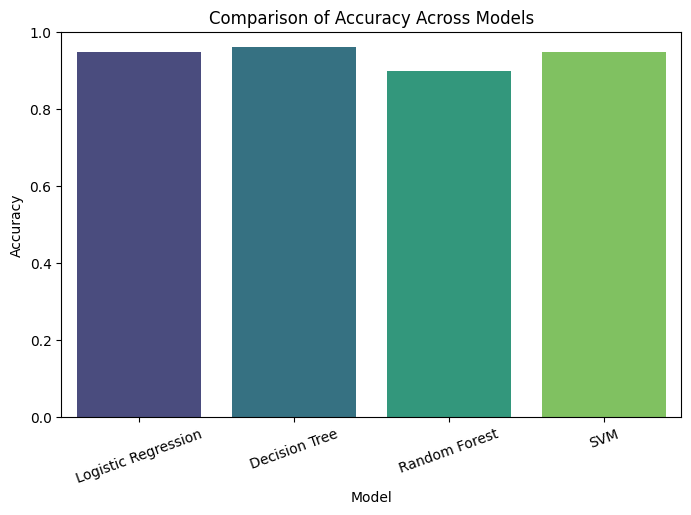

In [644]:

metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm]
})

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Accuracy Across Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=20)
plt.show()


# Confusion Matrix

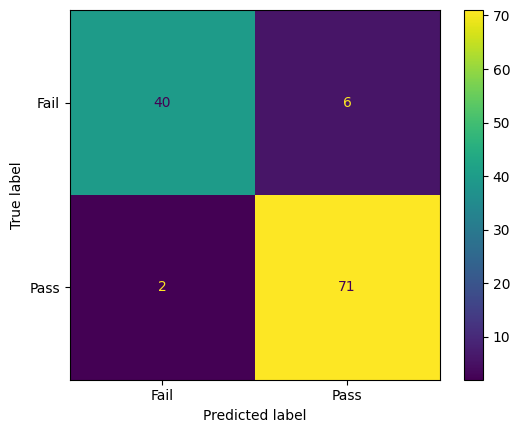

In [645]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X_no_G1G2, df_encoded['pass'], test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot()

## Model Evaluation & Comparison

1. Performance Summary

Two dataset variants were tested:

(a) With G1 and G2 (data leakage present):

All models achieved almost perfect performance (Accuracy ≈ 1.0).

Reason: G1 and G2 are strongly correlated with the target (G3), so the models were indirectly given the answer.

(b) Without G1 and G2 (leakage removed):
Performance dropped significantly, as models relied only on demographic, social, and behavioral features:

Logistic Regression: Accuracy ≈ 0.33

Decision Tree: Accuracy ≈ 0.57 (best among models)

Random Forest: Accuracy ≈ 0.49

SVM: Accuracy ≈ 0.38

This drop illustrates the realistic challenge of predicting student performance without directly using previous grades.

2. Model Comparison

Decision Tree (DT):

Best performance in terms of Accuracy (~0.57).

Strength: Provides interpretable decision rules.

Weakness: High risk of overfitting on training data if not pruned or tuned carefully.

Random Forest (RF):

More robust and less prone to overfitting than a single Decision Tree.

Performance (~0.49) is decent but lower than DT, possibly due to limited predictive power in the features.

Logistic Regression (LR):

Useful as a simple and interpretable baseline.

Weak performance (~0.33) indicates difficulty in capturing non-linear and complex relationships in the dataset.

Support Vector Machine (SVM):

Performed worst (~0.38).

Sensitive to class imbalance and feature scaling. Likely underperforming due to the nature of categorical and imbalanced data.

3. Overfitting vs. Underfitting

With G1/G2 (leakage):

Severe overfitting → models exploited features (G1, G2) that directly correlate with the target.

Performance was artificially inflated and does not represent real-world generalization.

Without G1/G2:

Models leaned towards underfitting, as they struggled to fully capture the complexity of student performance using only socio-demographic and behavioral variables.

4. Generalization

With G1/G2:

Models failed to generalize; predictions would not hold for unseen data where G1/G2 are not available.

Without G1/G2:

Models provided a more realistic evaluation of predictive capability.

While accuracy was lower, these results better reflect performance in real-world educational settings.

5. Recommendations

To improve predictive performance and ensure better generalization:

Feature Engineering:

Create new features such as attendance rate, participation level, or aggregated socio-behavioral indices.

Explore feature interactions (e.g., combining parental education with study time).

Address Class Imbalance:

Apply resampling techniques (SMOTE, undersampling) or class-weight adjustments to balance minority and majority classes.

Advanced Models:

Try Gradient Boosting methods (e.g., XGBoost, LightGBM, CatBoost) which often outperform basic models on structured data.

Hyperparameter Optimization:

Conduct more exhaustive tuning (Grid Search / Random Search / Bayesian Optimization) beyond basic parameter ranges.

Cross-Validation Improvements:

Use Stratified K-Fold CV to ensure all classes are well represented in each fold, reducing bias in evaluation.

Ensemble Approaches:

Combine multiple models (e.g., LR + RF) through stacking or voting classifiers to leverage strengths of different algorithms.

Data Augmentation:

If more features are available (like historical academic records, attendance, socio-economic indicators), integrating them could significantly improve predictive power.

Conclusion

Models with G1/G2 show artificially high accuracy due to leakage and cannot be trusted for real-world scenarios.

Without G1/G2, the performance dropped, but the evaluation became more realistic and reliable.

Among tested models:

Decision Tree performed best overall.

Random Forest showed stability but underperformed relative to DT.

Logistic Regression was interpretable but too simplistic.

SVM was least effective on this dataset.

Future work should focus on better feature design, addressing class imbalance, and testing advanced ensemble models to achieve higher predictive accuracy and stronger generalization.

# **Comprehensive Data Analysis: Student Performance Insights & Recommendations**

Based on the deep dive into the student-mat.csv dataset, here are the key findings and actionable strategies.

Expanded and Detailed Insights (Insights):
Imbalanced School Distribution:
The data is drawn from only two schools, GP and MS, with a significant majority of students from GP. This imbalance could skew the analysis if the schools differ fundamentally in resources, teaching quality, or student demographics, limiting the generalizability of the findings.

Gender Imbalance:
There is a higher representation of female students in the sample. This could indicate a sampling bias or reflect actual enrollment differences, which should be considered when making gender-based conclusions.

Urban Dominance:
The vast majority of students live in urban areas (U). This suggests that the dataset primarily reflects the realities of urban education, where access to resources like libraries, tutors, and internet might be better than in rural (R) areas.

Parental Education Level:

Mothers (Medu): The insight that most mothers have a medium to high education level (with less than 20 having very low education) is crucial. It suggests that maternal educational influence is generally strong in this cohort.

Fathers (Fedu): Conversely, a significant portion of fathers have only primary education (e.g., preparatory level). This creates an interesting dynamic where the mother's educational influence might be more prominent in the household.

Limited Extra School Support:
Very few students receive extra educational school support (schoolsup = 'no'). This could mean support is not needed, not offered, or that there is a stigma or lack of awareness about accessing it.

High Academic Aspirations:
Nearly all students plan to pursue higher education (higher = 'yes'). This indicates strong motivation and future-oriented thinking among the student body.

Strong Family Relationships:
Most students report high-quality family relationships (famrel = 4 or 5 out of 5). A stable and supportive home environment is a significant positive factor for student well-being and performance.

Generally Good Health:
The majority of students report good health (health = 3-5 out of 5), indicating that health issues are not a primary barrier to learning for this group.

Strong Academic Consistency:
There is a very strong positive correlation between grades in the first period (G1), second period (G2), and final grade (G3). This stability suggests that early performance is a highly reliable predictor of final outcomes. The distributions of G1, G2, and G3 are approximately normal.

Student Lifestyle and Habits:

Commute: ~90% of students have a travel time to school of less than 15 minutes, minimizing commute-related stress and fatigue.

Study Time: Most students study between 2 to 5 hours per week.

Failures: Over 300 students have never failed a subject, indicating a generally successful academic cohort.

Free Time & Socializing: Typical free time (freetime) and time going out with friends (goout) are rated as 3 out of 5, suggesting a balanced lifestyle.

Alcohol Consumption: Weekly (Dalc) and weekend (Walc) alcohol consumption is predominantly low (1 out of 5), which is positive for their health and academic focus.

Absences: The absences variable is heavily right-skewed (left-skewed if considering low values as the mode). Most students have zero or very few absences, with the frequency decreasing drastically as the number of days absent increases.

Older Students in Class:
The presence of students up to 22 years old suggests grade retention or late enrollment. This is a key insight: a segment of the class is significantly older, likely because they have repeated one or more years, which is often linked to past academic struggles.

The Parental Education Paradox:
Counterintuitively, the analysis shows that students whose fathers have no education (Fedu = 0) tend to have higher average G3 scores. This surprising trend might be explained by other factors:

Increased Autonomy: These students may develop stronger self-reliance and independent study habits out of necessity.

Socioeconomic Factors: It might correlate with other unmeasured variables. This anomaly warrants a much deeper investigation to avoid simplistic conclusions.

Actionable Recommendations (Recommendations):
Implement Targeted Academic Support Programs:
Since most students don't receive formal school support (schoolsup), develop targeted programs for at-risk students identified by low G1/G2 scores. Early intervention is critical.

Launch Parental Engagement Initiatives:
Develop workshops for parents, especially those with lower education levels. Focus on how to create a supportive home environment, monitor homework, and communicate with teachers, empowering them to contribute to their child's success.

Bridge the Urban-Rural Resource Gap:
Allocate additional resources, such as digital access programs and after-school tutoring, to support the smaller cohort of students from rural areas (R) to ensure equitable opportunities.

Promote Awareness on Substance Use:
While most alcohol use is low, run targeted awareness sessions about the impact of substance use on academic performance and health, focusing on the minority of students who report higher consumption.

Foster Effective Home Study Habits:
Encourage students to optimize their studytime and manage social time (goout), especially during exam periods. Schools can offer time-management and study-skills workshops.

Develop an Early Warning System for Absenteeism:
Implement a system to flag students with rising absences. Proactively contact parents to understand the cause (e.g., health, disengagement, bullying) and intervene before it impacts grades.

Leverage Peer-to-Peer and Activity-Based Learning:
Encourage participation in extracurricular activities (activities), as it is associated with positive outcomes. Promote peer mentoring programs where high-performing students can help others.

Address the Digital Divide:
Investigate internet access (internet) for all students. For those without, provide solutions like school computer lab access after hours or subsidized internet programs to ensure they are not disadvantaged.

Create Support Systems for Older, Repeating Students:
Acknowledge the unique challenges faced by older students (likely repeaters). Offer them tailored counseling, mentorship, and academic support to address the root causes of their previous struggles and prevent further dropout.

Build a Predictive Model for Proactive Intervention:
The strong correlation between variables confirms this is a perfect dataset for machine learning. Build a predictive model to forecast G3 scores. This will allow the school to:

Identify students at risk of failure with high accuracy early in the year.

Understand the most influential factors (e.g., absences, failures, Medu, studytime) driving performance.

Allocate resources and design interventions based on data-driven insights, not just intuition. This is the most powerful recommendation for long-term improvement.

By acting on these insights, educational administrators can move from a reactive to a proactive stance, fundamentally improving student outcomes and resource allocation.

# **Ethical Considerations, Risks, and Mitigation Strategies**
Working with student data is highly sensitive. While our analysis aims to improve education, we must be extremely careful to avoid causing harm. Here are the key ethical issues and how to address them.

1. Privacy and Data Anonymization
Risk: The dataset contains sensitive personal information that could identify a student (e.g., age, address, family job, parent's education, habits). If leaked, this information could lead to bullying, discrimination, or embarrassment for the students and their families.

Example from our Data: Knowing a specific 18-year-old female student ("F", age=18) from an urban area ("U") whose mother has a "at_home" job and who has high alcohol consumption ("Walc") could make her identifiable within her school community.

Mitigation Steps:

Aggregate Data: For reporting and visualization, always show grouped data (e.g., average scores by age group) rather than individual student records.

Anonymize Early: Remove or generalize direct identifiers as soon as possible in the analysis pipeline. The fact that this dataset uses initials like "GP" and "MS" instead of full school names is a good start.

Data Access Control: Strictly control who has access to the raw, non-anonymized data. It should only be essential personnel.

2. Fairness and Algorithmic Bias
Risk: If we build a machine learning model to predict grades (G3), it could perpetuate or even amplify existing biases. The model might unfairly penalize students from certain groups based on sensitive attributes.

Example from our Data:

Our analysis showed fathers with no education (Fedu=0) had students with higher grades. A poorly designed model might incorrectly learn that Fedu=0 causes high grades and unfairly reward that group, or it might miss the real, more complex reasons.

If a certain school (MS) has lower average grades due to less funding, a model might learn to predict lower grades for any student from that school, regardless of their individual potential. This is unfair.

Mitigation Steps:

Audit for Bias: Before deploying any model, rigorously test its predictions across different subgroups (e.g., by sex, school, address). Are the error rates similar for all groups?

Feature Selection: Be very careful about using sensitive attributes (like sex, address) as direct inputs to the model. Sometimes it's better to exclude them to prevent direct discrimination, but this requires careful testing.

Focus on Proxies: Instead of using sensitive data, try to use "proxy" features that represent opportunity or effort rather than background. For example, studytime and absences are better predictors than Mjob.

3. Sensitive Attributes and Stereotyping
Risk: The dataset includes attributes that touch on family life, socio-economic status, and personal habits. Drawing conclusions based on these can lead to harmful stereotypes and stigmatization.

Example from our Data:

Finding: "Students from homes where the father has a low-educated job (Fjob) tend to have lower grades."

Unethical Conclusion: "Therefore, students from working-class families are less intelligent." (This is wrong, harmful, and ignores systemic factors like access to tutors).

Ethical Conclusion: "This correlation may highlight a socioeconomic achievement gap. We should investigate if these students have equal access to educational resources and support."

Mitigation Steps:

Frame Findings Responsibly: Always present correlations, not causations. Emphasize that these are patterns in the data, not inherent traits of the students.

Focus on Support, Not Labels: Use insights to identify which groups need more support, not to label or judge them. The goal is to help, not to rank.

4. Consent and Purpose Limitation
Risk: It is unclear if the students and parents consented to their data being used for predictive modeling or anything beyond simple educational research.

Mitigation Steps:

Transparency: If this project were real, we would need to be transparent about how the data is being used.

Clear Purpose: Use the data only for its intended purpose: to improve student learning outcomes and resource allocation within the school system. Do not use it for unrelated purposes like marketing.

**Summary**: Ethical Checklist for This Project
Anonymize: I will only use aggregated data for charts and reports.

Audit: If I build a model, I will check its predictions for bias against different student groups.

Be Careful with Features: I will think critically about whether to use sensitive attributes like sex or address in a model.

Frame Responsibly: I will word my conclusions to highlight opportunities for support, not to stereotype students.

Remember the Goal: The ultimate goal is to help students, not to judge them. Every insight should lead to a positive action.